# Objetivo geral: 

Criar modelo de machine learning classificador para processo seletivo


# Objetivo específico:

O modelo será usado para indicar quais candidatos permanecerão na empresa ao menos 2 anos

# 1 Limpeza de dados

1.1 Lidando com dados indesejados, extração de dados, estrutura de dados e ausência de valores

In [1]:
#Importando as bibliotecas fundamentais
import numpy as np #Para manipulação matemática 
import pandas as pd #Para manipulação de data frames e series
import seaborn as sns #Para visualização gráfica
import matplotlib.pyplot as plt #Para visualização gráfica

In [554]:
#Importando dataset
rh = pd.read_excel(r'C:\Users\Usuario\OneDrive\Documentos\DS_OneDrive_Bruno\Datasets\RH.xlsx')

In [555]:
#Visualizando shape do dataframe
rh.shape

(310, 19)

In [556]:
#Buscando os títulos de colunas
rh.columns

Index(['Nome do Empregado', 'ID', 'PerfScoreID', 'Salário Mensal Corrigido',
       'Cargo', 'Data de Nascimento', 'Sexo', 'Estado Civil',
       'Data de Contratação', 'Data de Saída', 'Motivo Saída',
       'Status do Integrante', 'Departamento', 'Fonte Recrutamento',
       'Registro de Performance ', 'Pesquisa de Engajamento',
       'Índice de Satisfação', 'SpecialProjectsCount',
       'Última atualização de Performance'],
      dtype='object')

In [691]:
#Selecionando algumas colunas para análise
info_df = rh.loc[:,['Salário Mensal Corrigido', 'Cargo', 'Data de Nascimento', 'Sexo', 'Estado Civil', 'Motivo Saída',
                   'Departamento', 'Fonte Recrutamento', 'SpecialProjectsCount', 'Data de Contratação', 'Data de Saída']]

#Visualizando shape do novo sub data frame gerado
info_df.shape

(310, 11)

In [692]:
#Visualizando o sub data frame
info_df.head()

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,Data de Contratação,Data de Saída
0,5060,Técnico de Produção I,1982-05-21,F,Solteiro,N/A - Empregado,Produção,Site da Empresa,0,2015-09-01,NaT
1,3520,Técnico de Produção I,1975-12-21,M,Solteiro,N/A - Empregado,Produção,Indicação Funcionários,0,2015-02-03,NaT
2,4400,Técnico de Produção I,1972-04-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,2017-07-06,NaT
3,3960,Técnico de Produção I,1994-10-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,2018-11-04,NaT
4,3520,Técnico de Produção I,1985-08-04,F,Solteiro,N/A - Empregado,Produção,Feira de Contratação,0,2017-09-28,NaT


In [693]:
#Valores únicos do Salário Mensal Corrigido
np.unique(info_df['Salário Mensal Corrigido'], return_counts=True)

(array([ 3080,  3300,  3344,  3355,  3465,  3520,  3643,  3685,  3687,
         3740,  3960,  4070,  4180,  4250,  4290,  4345,  4400,  4510,
         4620,  4675,  4730,  4840,  4950,  5060,  5170,  5280,  5335,
         5350,  5390,  5400,  5445,  5500,  5720,  5742,  5806,  5940,
         6048,  6160,  6270,  6325,  6378,  6380,  6644,  6908,  7370,
         7480,  7500,  7689,  7810,  8000,  8140,  8470,  8580,  8600,
         8701,  8800,  8822,  9020,  9240,  9284,  9405,  9460,  9900,
         9992, 10000, 10250, 10340, 10472, 10500, 10560, 10670, 10802,
        10835, 11110, 11150, 11200, 11220, 11440, 11495, 11660, 11836,
        11880, 11902, 11990, 12100, 12144, 12212, 12320, 12364, 12566,
        12804, 12870, 13200, 13255, 13486, 13640, 13860, 14080, 14300,
        17600], dtype=int64),
 array([ 5, 13,  1,  1,  1, 13,  1,  1,  1, 12,  8,  1, 11,  2,  1,  2, 16,
         1, 16,  1,  1, 25,  1, 10,  1, 15,  2,  1,  1,  5,  1,  9,  8,  1,
         1,  7,  1,  5,  1,  1,  1,  

In [694]:
#Valores mínimo e máximo da variável Salário Mensal Corrigido
print('O menor salário é', info_df['Salário Mensal Corrigido'].min())
print('O maior salário é', info_df['Salário Mensal Corrigido'].max())

O menor salário é 3080
O maior salário é 17600


In [695]:
#Valores únicos da variável Cargo
np.unique(info_df['Cargo'], return_counts=True)

(array(['Analista Comercial I', 'Analista Comercial II',
        'Analista Comercial III', 'Analista de BI I', 'Analista de BI II',
        'Analista de Dados I', 'Analista de Dados II',
        'Analista de Dados III', 'Analista de Suporte de TI',
        'Assistente Administrativo', 'Auxiliar de Suporte de TI',
        'Contador I', 'Contador II', 'Diretor Administrativo',
        'Diretor Comercial', 'Diretor de Produção', 'Diretor de TI',
        'Engenheiro de Software', 'Engenheiro de Software II',
        'Gerente  de TI', 'Gerente Administrativo', 'Gerente Comercial',
        'Gerente de BI', 'Gerente de Eng. Software', 'Gerente de Produção',
        'Gerente de TI', 'Técnico de Produção I', 'Técnico de Produção II'],
       dtype=object),
 array([  9,  11,   7,   4,   3,   2,   2,   6,  13,   3,   1,   3,   2,
          1,   1,   1,   1,  14,   5,   3,   2,   3,   1,   1,  14,   4,
        136,  57], dtype=int64))

In [696]:
#Valores únicos da variável Data de Nascimento
np.unique(info_df['Data de Nascimento'], return_counts=True) #Range do ano de nascimento

(array(['1956-01-31T00:00:00.000000000', '1956-02-24T00:00:00.000000000',
        '1957-01-16T00:00:00.000000000', '1957-08-17T00:00:00.000000000',
        '1957-11-01T00:00:00.000000000', '1958-05-23T00:00:00.000000000',
        '1959-09-20T00:00:00.000000000', '1959-12-09T00:00:00.000000000',
        '1960-04-12T00:00:00.000000000', '1960-11-12T00:00:00.000000000',
        '1963-07-10T00:00:00.000000000', '1963-12-26T00:00:00.000000000',
        '1964-08-17T00:00:00.000000000', '1966-06-18T00:00:00.000000000',
        '1968-05-13T00:00:00.000000000', '1968-08-26T00:00:00.000000000',
        '1968-10-28T00:00:00.000000000', '1969-01-04T00:00:00.000000000',
        '1969-03-31T00:00:00.000000000', '1969-04-12T00:00:00.000000000',
        '1969-07-29T00:00:00.000000000', '1969-12-09T00:00:00.000000000',
        '1970-02-01T00:00:00.000000000', '1970-07-04T00:00:00.000000000',
        '1970-09-04T00:00:00.000000000', '1970-09-08T00:00:00.000000000',
        '1971-03-16T00:00:00.000000000

In [697]:
#Data para: última contratação, demissão e atualização de performance
print('Data da contratação mais recente',rh['Data de Contratação'].max())
print('Data da demissão mais recente', rh['Data de Saída'].max())
print('Data da atualização de performance mais recente', rh['Última atualização de Performance'].max())

Data da contratação mais recente 2019-08-05 00:00:00
Data da demissão mais recente 2019-08-02 00:00:00
Data da atualização de performance mais recente 2016-12-01 00:00:00


In [698]:
#Criando a coluna idade
info_df ['idade'] = 2019 - info_df['Data de Nascimento'].dt.year

In [699]:
#Criando variável com idade de demissão
info_df['idade_demissao'] = rh['Data de Saída'].dt.year - info_df['Data de Nascimento'].dt.year

In [700]:
#Visualização do resultado
info_df

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,Data de Contratação,Data de Saída,idade,idade_demissao
0,5060,Técnico de Produção I,1982-05-21,F,Solteiro,N/A - Empregado,Produção,Site da Empresa,0,2015-09-01,NaT,37,NaN
1,3520,Técnico de Produção I,1975-12-21,M,Solteiro,N/A - Empregado,Produção,Indicação Funcionários,0,2015-02-03,NaT,44,NaN
2,4400,Técnico de Produção I,1972-04-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,2017-07-06,NaT,47,NaN
3,3960,Técnico de Produção I,1994-10-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,2018-11-04,NaT,25,NaN
4,3520,Técnico de Produção I,1985-08-04,F,Solteiro,N/A - Empregado,Produção,Feira de Contratação,0,2017-09-28,NaT,34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,6160,Técnico de Produção II,1989-02-14,F,Casado(a),Mudança de Carreira,Produção,Site de Vagas,0,2017-08-14,2018-07-03,30,29.0
306,5280,Técnico de Produção II,1981-12-25,F,Solteiro,Infeliz,Produção,Feira de Contratação,0,2016-08-06,2016-09-14,38,35.0
307,5060,Técnico de Produção II,1992-11-23,F,Solteiro,Infeliz,Produção,Site de Vagas,0,2012-10-25,2018-08-03,27,26.0
308,5500,Técnico de Produção II,1957-11-01,F,Casado(a),Infeliz,Produção,Site de Vagas,0,2015-05-14,2016-08-18,62,59.0


In [701]:
#Valores únicos
np.unique(info_df['idade_demissao'], return_counts=True)

(array([20., 21., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33.,
        34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 47.,
        48., 49., 50., 55., 56., 57., 58., 59., 60., 61., 62., nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan

In [702]:
#Preenchendo valores negativos da coluna de idade de demissão
info_df['idade_demissao'].fillna(0, inplace=True)
info_df.head()

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,Data de Contratação,Data de Saída,idade,idade_demissao
0,5060,Técnico de Produção I,1982-05-21,F,Solteiro,N/A - Empregado,Produção,Site da Empresa,0,2015-09-01,NaT,37,0.0
1,3520,Técnico de Produção I,1975-12-21,M,Solteiro,N/A - Empregado,Produção,Indicação Funcionários,0,2015-02-03,NaT,44,0.0
2,4400,Técnico de Produção I,1972-04-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,2017-07-06,NaT,47,0.0
3,3960,Técnico de Produção I,1994-10-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,2018-11-04,NaT,25,0.0
4,3520,Técnico de Produção I,1985-08-04,F,Solteiro,N/A - Empregado,Produção,Feira de Contratação,0,2017-09-28,NaT,34,0.0


In [703]:
np.unique(rh['Data de Saída'], return_counts=True)[0]

array(['2016-01-04T00:00:00.000000000', '2016-02-18T00:00:00.000000000',
       '2016-04-14T00:00:00.000000000', '2016-05-05T00:00:00.000000000',
       '2016-06-03T00:00:00.000000000', '2016-06-05T00:00:00.000000000',
       '2016-06-14T00:00:00.000000000', '2016-06-17T00:00:00.000000000',
       '2016-06-23T00:00:00.000000000', '2016-06-30T00:00:00.000000000',
       '2016-07-29T00:00:00.000000000', '2016-08-18T00:00:00.000000000',
       '2016-08-29T00:00:00.000000000', '2016-09-14T00:00:00.000000000',
       '2016-09-24T00:00:00.000000000', '2017-02-07T00:00:00.000000000',
       '2017-02-24T00:00:00.000000000', '2017-03-30T00:00:00.000000000',
       '2017-04-03T00:00:00.000000000', '2017-04-05T00:00:00.000000000',
       '2017-04-07T00:00:00.000000000', '2017-04-08T00:00:00.000000000',
       '2017-04-14T00:00:00.000000000', '2017-04-23T00:00:00.000000000',
       '2017-05-08T00:00:00.000000000', '2017-05-14T00:00:00.000000000',
       '2017-05-16T00:00:00.000000000', '2017-05-29

In [704]:
#Resultado
info_df.head()

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,Data de Contratação,Data de Saída,idade,idade_demissao
0,5060,Técnico de Produção I,1982-05-21,F,Solteiro,N/A - Empregado,Produção,Site da Empresa,0,2015-09-01,NaT,37,0.0
1,3520,Técnico de Produção I,1975-12-21,M,Solteiro,N/A - Empregado,Produção,Indicação Funcionários,0,2015-02-03,NaT,44,0.0
2,4400,Técnico de Produção I,1972-04-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,2017-07-06,NaT,47,0.0
3,3960,Técnico de Produção I,1994-10-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,2018-11-04,NaT,25,0.0
4,3520,Técnico de Produção I,1985-08-04,F,Solteiro,N/A - Empregado,Produção,Feira de Contratação,0,2017-09-28,NaT,34,0.0


In [705]:
#Valores únicos para idade
np.unique(info_df['idade'], return_counts=True)

(array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 55, 56, 59,
        60, 61, 62, 63], dtype=int64),
 array([ 3,  3,  5, 14, 17, 19, 21, 13, 16, 21,  8, 14,  9, 19,  8, 11,  9,
         9, 12,  9,  7,  2, 12,  7,  7,  4,  4,  5,  5,  3,  1,  1,  2,  2,
         2,  1,  3,  2], dtype=int64))

In [706]:
#Tipo de dado da coluna idade
info_df['idade'].dtype

dtype('int64')

In [707]:
#Valores únicos da coluna Sexo
np.unique(info_df['Sexo'])

array(['F', 'M'], dtype=object)

In [708]:
#Valores únicos da coluna Estado Civil
np.unique(info_df['Estado Civil'])

array(['Casado(a)', 'Solteiro'], dtype=object)

In [709]:
#Valores únicos da da coluna Motivo Saída
np.unique(info_df['Motivo Saída'])

array(['Abandono', 'Excesso de Faltas', 'Infeliz', 'Mal comportamento',
       'Mudança de Carreira', 'N/A - Empregado', 'Performance',
       'Proposta do Concorrente'], dtype=object)

In [710]:
#Valores únicos da coluna Departamento
np.unique(info_df['Departamento'])

array(['Administrativo', 'Produção', 'TI', 'Vendas'], dtype=object)

In [711]:
#Valores únicos da Fonte Recrutamento
np.unique(info_df['Fonte Recrutamento'])

array(['Feira de Contratação', 'Indicação Funcionários',
       'Site da Empresa', 'Site de Vagas'], dtype=object)

In [712]:
#Valores únicos da coluna Special projects count
np.unique(info_df['SpecialProjectsCount'])

array([0, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [713]:
#Valores únicos da coluna Data de Contratação
np.unique(info_df['Data de Contratação'])

array(['2009-08-31T00:00:00.000000000', '2010-05-10T00:00:00.000000000',
       '2011-02-08T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-10-27T00:00:00.000000000', '2012-04-26T00:00:00.000000000',
       '2012-04-30T00:00:00.000000000', '2012-06-06T00:00:00.000000000',
       '2012-07-31T00:00:00.000000000', '2012-10-25T00:00:00.000000000',
       '2013-01-04T00:00:00.000000000', '2013-04-25T00:00:00.000000000',
       '2013-06-24T00:00:00.000000000', '2013-07-19T00:00:00.000000000',
       '2013-08-29T00:00:00.000000000', '2013-09-26T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', '2013-10-24T00:00:00.000000000',
       '2014-01-07T00:00:00.000000000', '2014-01-20T00:00:00.000000000',
       '2014-02-04T00:00:00.000000000', '2014-02-20T00:00:00.000000000',
       '2014-03-09T00:00:00.000000000', '2014-04-03T00:00:00.000000000',
       '2014-04-14T00:00:00.000000000', '2014-05-06T00:00:00.000000000',
       '2014-05-15T00:00:00.000000000', '2014-05-30

In [714]:
#Valores únicos da coluna Data de Saída
np.unique(info_df['Data de Saída'])

array(['2016-01-04T00:00:00.000000000', '2016-02-18T00:00:00.000000000',
       '2016-04-14T00:00:00.000000000', '2016-05-05T00:00:00.000000000',
       '2016-06-03T00:00:00.000000000', '2016-06-05T00:00:00.000000000',
       '2016-06-14T00:00:00.000000000', '2016-06-17T00:00:00.000000000',
       '2016-06-23T00:00:00.000000000', '2016-06-30T00:00:00.000000000',
       '2016-07-29T00:00:00.000000000', '2016-08-18T00:00:00.000000000',
       '2016-08-29T00:00:00.000000000', '2016-09-14T00:00:00.000000000',
       '2016-09-24T00:00:00.000000000', '2017-02-07T00:00:00.000000000',
       '2017-02-24T00:00:00.000000000', '2017-03-30T00:00:00.000000000',
       '2017-04-03T00:00:00.000000000', '2017-04-05T00:00:00.000000000',
       '2017-04-07T00:00:00.000000000', '2017-04-08T00:00:00.000000000',
       '2017-04-14T00:00:00.000000000', '2017-04-23T00:00:00.000000000',
       '2017-05-08T00:00:00.000000000', '2017-05-14T00:00:00.000000000',
       '2017-05-16T00:00:00.000000000', '2017-05-29

In [715]:
#Buscando quantidade de ausência de valores
info_df.isnull().sum()

Salário Mensal Corrigido      0
Cargo                         0
Data de Nascimento            0
Sexo                          0
Estado Civil                  0
Motivo Saída                  0
Departamento                  0
Fonte Recrutamento            0
SpecialProjectsCount          0
Data de Contratação           0
Data de Saída               207
idade                         0
idade_demissao                0
dtype: int64

In [716]:
#Preenchendo com 0 a ausência de valores da coluna data de saída
info_df['Data de Saída'].fillna(0, inplace=True)

In [717]:
#Buscando quantidade de ausência de valores
info_df.isnull().sum()

Salário Mensal Corrigido    0
Cargo                       0
Data de Nascimento          0
Sexo                        0
Estado Civil                0
Motivo Saída                0
Departamento                0
Fonte Recrutamento          0
SpecialProjectsCount        0
Data de Contratação         0
Data de Saída               0
idade                       0
idade_demissao              0
dtype: int64

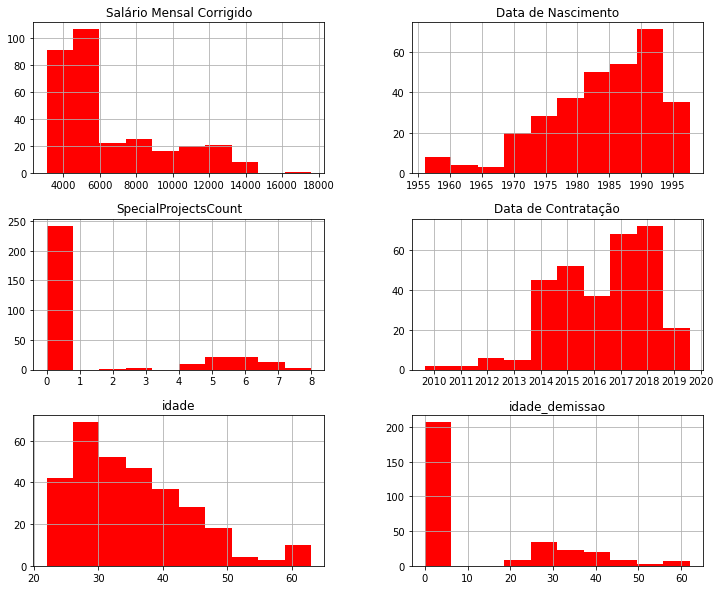

In [718]:
#Buscando valores negativos
info_df.hist(color='red', figsize=(12,10));

In [719]:
#Informações estruturais
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Salário Mensal Corrigido  310 non-null    int64         
 1   Cargo                     310 non-null    object        
 2   Data de Nascimento        310 non-null    datetime64[ns]
 3   Sexo                      310 non-null    object        
 4   Estado Civil              310 non-null    object        
 5   Motivo Saída              310 non-null    object        
 6   Departamento              310 non-null    object        
 7   Fonte Recrutamento        310 non-null    object        
 8   SpecialProjectsCount      310 non-null    int64         
 9   Data de Contratação       310 non-null    datetime64[ns]
 10  Data de Saída             310 non-null    object        
 11  idade                     310 non-null    int64         
 12  idade_demissao        

In [720]:
#Valores únicos para ID
np.unique(rh['ID'], return_counts=True)[1] #Buscando repetição - inconsistência

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

1.2 Lidando com outliers e preconceitos sociais

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


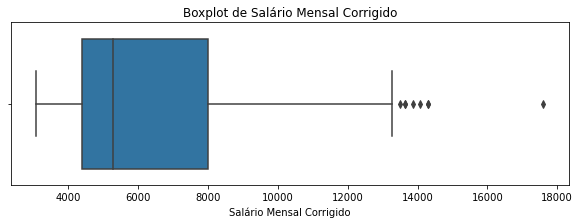

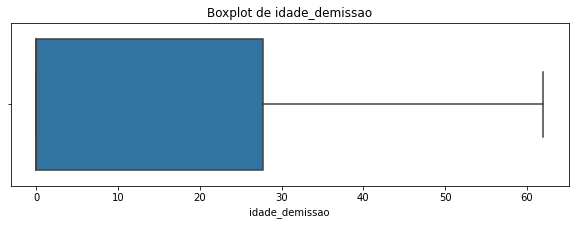

In [721]:
#Gerindo outliers indesejados
#Prolando boxplot para análise de outliers
cols = ['Salário Mensal Corrigido', 'idade_demissao']
for col in cols:
    plt.figure(figsize=(10,3))
    sns.boxplot(info_df[col])
    plt.title('Boxplot de {}'.format(col));

In [722]:
#Exibindo quantidade de salários acima de R$ 13000
acima_12_df = info_df[info_df['Salário Mensal Corrigido'] > 12000]
acima_12_df.shape

(25, 13)

In [723]:
#Percentual representativo
print(round((25 * 100)/info_df.shape[0], 2),'%')

8.06 %


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


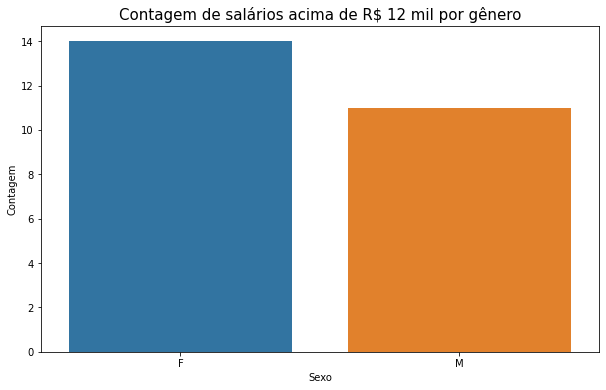

In [724]:
#Gerando gráfico de contagem de gênero
plt.figure(figsize=(10,6))
sns.countplot(acima_12_df['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem de salários acima de R$ 12 mil por gênero', fontsize=15);

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


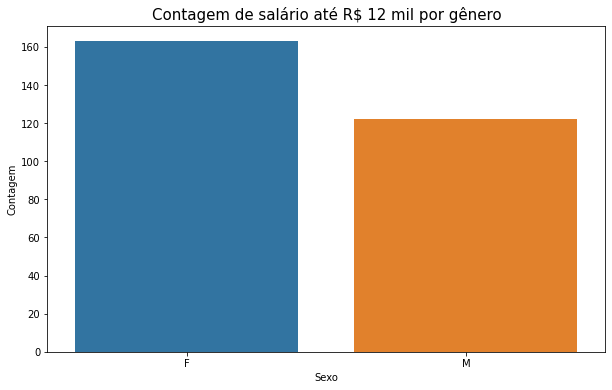

In [725]:
#Exibindo quantidade de salários até de R$ 12000
ate_12_df = info_df[info_df['Salário Mensal Corrigido'] <= 12000]

#Gerando gráfico de contagem de gênero
plt.figure(figsize=(10,6))
sns.countplot(ate_12_df['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem de salário até R$ 12 mil por gênero', fontsize=15);

In [726]:
#Separando entre empregados e desempregados
empregado_df = info_df[info_df['Motivo Saída'] == 'N/A - Empregado']
demitido_df = info_df[info_df['Motivo Saída'] != 'N/A - Empregado']

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


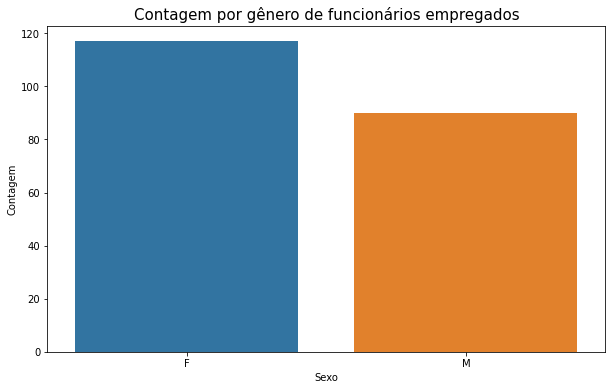

In [727]:
#Gerando gráfico de contagem de empregados por gênero
plt.figure(figsize=(10,6))
sns.countplot(empregado_df['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem por gênero de funcionários empregados', fontsize=15);

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


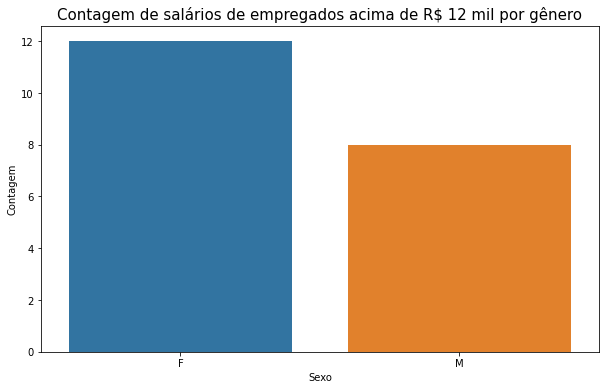

In [728]:
#Gerando gráfico de contagem de funcionários por gênero que ganham acima de 12000
acima_12 = empregado_df[empregado_df['Salário Mensal Corrigido'] > 12000]
plt.figure(figsize=(10,6))
sns.countplot(acima_12['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem de salários de empregados acima de R$ 12 mil por gênero', fontsize=15);

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


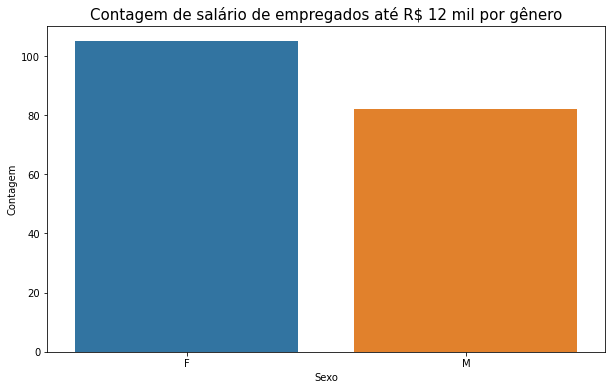

In [729]:
#Gerando gráfico de contagem de funcionários que ganham até 12000
ate_12 = empregado_df[empregado_df['Salário Mensal Corrigido'] <= 12000]
plt.figure(figsize=(10,6))
sns.countplot(ate_12['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem de salário de empregados até R$ 12 mil por gênero', fontsize=15);

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


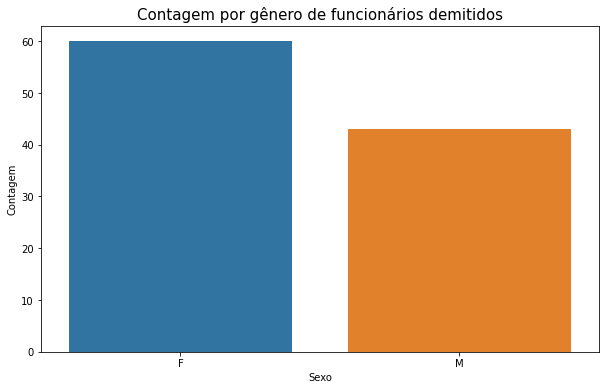

In [730]:
#Gerando gráfico de contagem de demitidos por gênero
plt.figure(figsize=(10,6))
sns.countplot(demitido_df['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem por gênero de funcionários demitidos', fontsize=15);

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


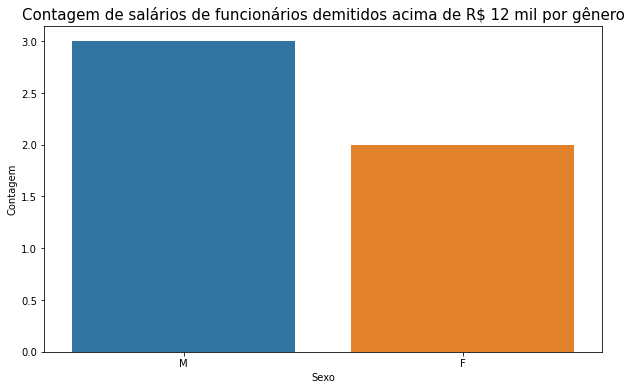

In [731]:
#Gerando gráfico de contagem de demitidos por gênero que ganham acima de 12000
acima_12 = demitido_df[demitido_df['Salário Mensal Corrigido'] > 12000]
plt.figure(figsize=(10,6))
sns.countplot(acima_12['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem de salários de funcionários demitidos acima de R$ 12 mil por gênero', fontsize=15);

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


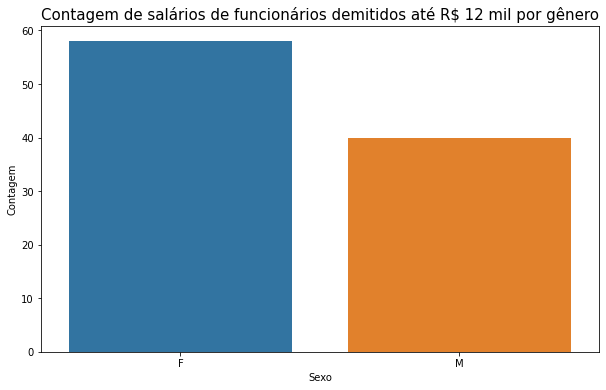

In [732]:
#Gerando gráfico de contagem de demitidos por gênero que ganham até 12000
ate_12 = demitido_df[demitido_df['Salário Mensal Corrigido'] <= 12000]
plt.figure(figsize=(10,6))
sns.countplot(ate_12['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem de salários de funcionários demitidos até R$ 12 mil por gênero', fontsize=15);

In [733]:
#Informações de funcionários que ganham acima de 13000
info_df[info_df['Salário Mensal Corrigido'] > 13000]

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,Data de Contratação,Data de Saída,idade,idade_demissao
108,13200,Diretor de Produção,1988-03-17,F,Solteiro,N/A - Empregado,Produção,Feira de Contratação,0,2012-04-30,0,31,0.0
109,13200,Diretor Comercial,1971-03-16,F,Casado(a),N/A - Empregado,Vendas,Site da Empresa,0,2017-05-04,0,48,0.0
110,17600,Diretor Administrativo,1959-09-20,F,Casado(a),N/A - Empregado,Administrativo,Site de Vagas,0,2015-02-06,0,60,0.0
163,14300,Diretor de TI,1984-08-28,F,Solteiro,N/A - Empregado,TI,Indicação Funcionários,6,2013-10-03,0,35,0.0
173,14300,Gerente de TI,1985-05-06,M,Solteiro,N/A - Empregado,TI,Feira de Contratação,5,2014-04-14,0,34,0.0
174,13640,Gerente de TI,1978-05-03,M,Solteiro,N/A - Empregado,TI,Feira de Contratação,7,2016-01-20,0,41,0.0
175,13860,Gerente de TI,1991-05-09,M,Casado(a),N/A - Empregado,TI,Site de Vagas,6,2015-02-14,0,28,0.0
176,14080,Gerente de TI,1975-09-06,M,Solteiro,N/A - Empregado,TI,Feira de Contratação,5,2017-04-30,0,44,0.0
201,13486,Gerente de TI,1991-06-05,F,Solteiro,N/A - Empregado,TI,Indicação Funcionários,6,2019-06-30,0,28,0.0
219,13640,Gerente de TI,1980-05-03,M,Casado(a),Mudança de Carreira,TI,Indicação Funcionários,6,2018-03-29,2019-06-16 00:00:00,39,39.0


In [734]:
#Descrição estatística de funcionários que ganham acima de 13 mil
info_df[info_df['Salário Mensal Corrigido'] > 13000].describe()

,Salário Mensal Corrigido,SpecialProjectsCount,idade,idade_demissao
count,11.000000,11.000000,11.000000,11.000000
mean,14051.000000,3.727273,37.545455,5.636364
std,1244.821674,3.003029,10.347595,13.040496
min,13200.000000,0.000000,25.000000,0.000000
25%,13370.500000,0.000000,29.500000,0.000000
50%,13640.000000,5.000000,35.000000,0.000000
75%,14190.000000,6.000000,42.500000,0.000000
max,17600.000000,7.000000,60.000000,39.000000


In [735]:
#Valores únicos da variável Motivo Saída
np.unique(info_df['Motivo Saída'])

array(['Abandono', 'Excesso de Faltas', 'Infeliz', 'Mal comportamento',
       'Mudança de Carreira', 'N/A - Empregado', 'Performance',
       'Proposta do Concorrente'], dtype=object)

In [736]:
#Buscando intervalos de frequência e quantidade de classes para idade
frequencias, classes = np.histogram(info_df['idade'], bins='sturges')
frequencias, classes, len(classes)

(array([42, 69, 52, 47, 37, 28, 18,  4,  3, 10], dtype=int64),
 array([22. , 26.1, 30.2, 34.3, 38.4, 42.5, 46.6, 50.7, 54.8, 58.9, 63. ]),
 11)

In [737]:
#Criando faixa etária e aplicando em data frame
info_df['faixa_etaria'] = pd.cut(info_df['idade'], bins=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65],
                                 labels=['18-25', '25-30', '30-35', '35-40', '40-45', '45-50',
                                        '50-55', '55-60', '60-65'])

In [738]:
np.unique(info_df['faixa_etaria'], return_counts=True)

(array(['18-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55',
        '55-60', '60-65'], dtype=object),
 array([25, 86, 71, 49, 37, 25,  5,  6,  6], dtype=int64))

In [739]:
#Buscando intervalos de frequência e quantidade de classes para idade de demissão
frequencias, classes = np.histogram(info_df['idade_demissao'], bins='sturges')
frequencias, classes, len(classes)

(array([207,   0,   0,   9,  34,  23,  20,   8,   2,   7], dtype=int64),
 array([ 0. ,  6.2, 12.4, 18.6, 24.8, 31. , 37.2, 43.4, 49.6, 55.8, 62. ]),
 11)

In [740]:
#Gerando faixa etaria de demissao
info_df['faixa_etaria_demissao'] = pd.cut(info_df['idade_demissao'],
                                         bins=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65],
                                         labels=['18-25', '25-30', '30-35', '35-40', '40-45', '45-50',
                                        '50-55', '55-60', '60-65'])

In [741]:
#Visualizando resultado
info_df.head()

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,Data de Contratação,Data de Saída,idade,idade_demissao,faixa_etaria,faixa_etaria_demissao
0,5060,Técnico de Produção I,1982-05-21,F,Solteiro,N/A - Empregado,Produção,Site da Empresa,0,2015-09-01,0,37,0.0,35-40,NaN
1,3520,Técnico de Produção I,1975-12-21,M,Solteiro,N/A - Empregado,Produção,Indicação Funcionários,0,2015-02-03,0,44,0.0,40-45,NaN
2,4400,Técnico de Produção I,1972-04-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,2017-07-06,0,47,0.0,45-50,NaN
3,3960,Técnico de Produção I,1994-10-17,M,Casado(a),N/A - Empregado,Produção,Site de Vagas,0,2018-11-04,0,25,0.0,18-25,NaN
4,3520,Técnico de Produção I,1985-08-04,F,Solteiro,N/A - Empregado,Produção,Feira de Contratação,0,2017-09-28,0,34,0.0,30-35,NaN


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


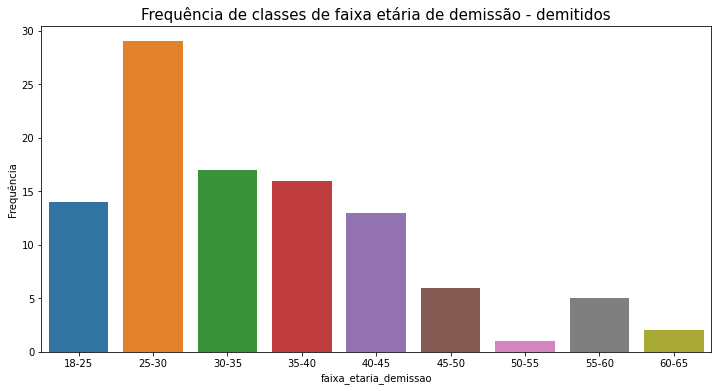

In [742]:
#Contagem de classes de faixa etária de demissão para funcionários demitidos
plt.figure(figsize=(12,6))
sns.countplot(info_df[info_df['Motivo Saída'] != 'N/A- Empregado']['faixa_etaria_demissao'])
plt.title('Frequência de classes de faixa etária de demissão - demitidos', fontsize=15)
plt.ylabel('Frequência');

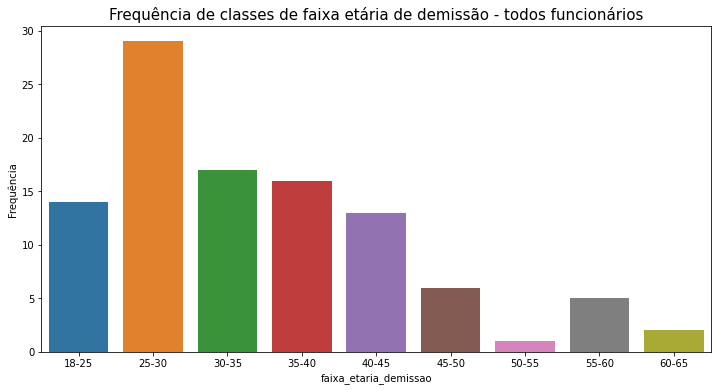

In [743]:
#Contagem de classes de faixa etária de demissão dos funcionários em geral
plt.figure(figsize=(12,6))
sns.countplot(info_df['faixa_etaria_demissao'])
plt.title('Frequência de classes de faixa etária de demissão - todos funcionários', fontsize=15)
plt.ylabel('Frequência');

In [744]:
#Analisando estrutura dos dados após crianção da coluna Faixa Etária
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Salário Mensal Corrigido  310 non-null    int64         
 1   Cargo                     310 non-null    object        
 2   Data de Nascimento        310 non-null    datetime64[ns]
 3   Sexo                      310 non-null    object        
 4   Estado Civil              310 non-null    object        
 5   Motivo Saída              310 non-null    object        
 6   Departamento              310 non-null    object        
 7   Fonte Recrutamento        310 non-null    object        
 8   SpecialProjectsCount      310 non-null    int64         
 9   Data de Contratação       310 non-null    datetime64[ns]
 10  Data de Saída             310 non-null    object        
 11  idade                     310 non-null    int64         
 12  idade_demissao        

# 2 Análise exploratória

In [745]:
#Separando dataset entre empregados e demitidos
empregado_df = info_df[info_df['Motivo Saída'] == 'N/A - Empregado']
demitido_df = info_df[info_df['Motivo Saída'] != 'N/A - Empregado']

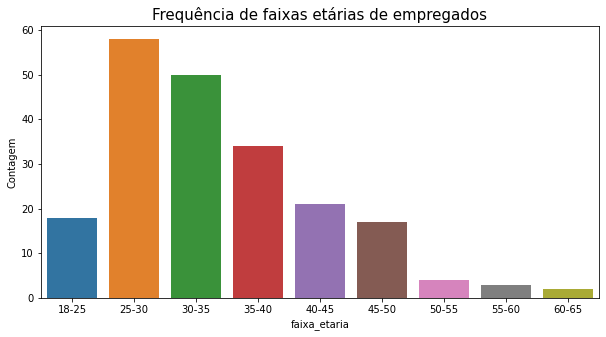

In [746]:
#Frequência de faixas etárias dos empregados
#Gerando faixa etaria
plt.figure(figsize=(10,5))
sns.countplot(empregado_df['faixa_etaria'])
plt.ylabel('Contagem')
plt.title('Frequência de faixas etárias de empregados', fontsize=15);

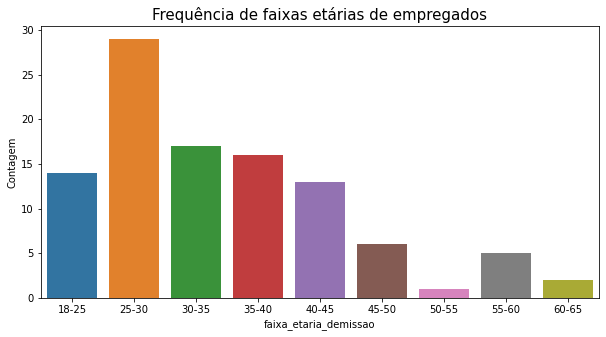

In [747]:
#Frequência de faixas etárias dos empregados
#Gerando faixa etaria
plt.figure(figsize=(10,5))
sns.countplot(demitido_df['faixa_etaria_demissao'])
plt.ylabel('Contagem')
plt.title('Frequência de faixas etárias de empregados', fontsize=15);

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


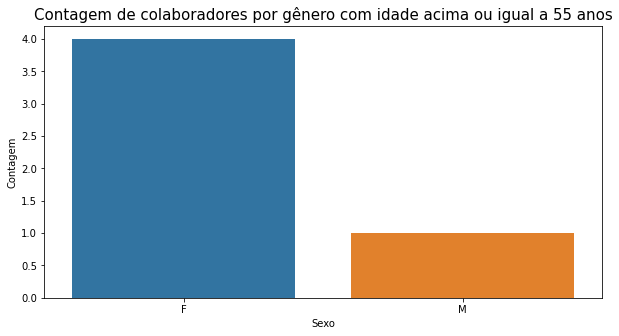

In [748]:
#Contagem de colaboradores com idade acima ou igual a 55 anos em função do gênero
plt.figure(figsize=(10,5))
sns.countplot(empregado_df[empregado_df['idade'] >= 55]['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem de colaboradores por gênero com idade acima ou igual a 55 anos', fontsize=15);

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


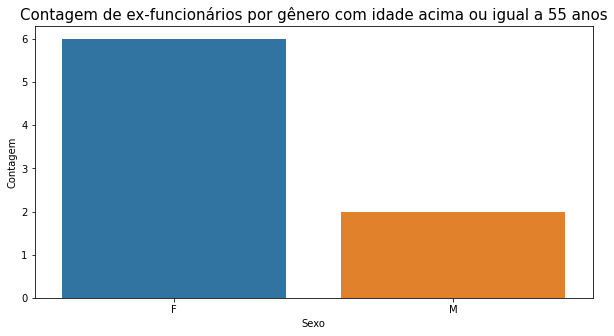

In [749]:
#Contagem de ex funcionários com idade acima ou igual a 55 anos em função do gênero
plt.figure(figsize=(10,5))
sns.countplot(info_df[info_df['idade_demissao'] >= 55]['Sexo'])
plt.ylabel('Contagem')
plt.title('Contagem de ex-funcionários por gênero com idade acima ou igual a 55 anos', fontsize=15);

In [750]:
#Resumo estatístico dos funcionários ativos
empregado_df.describe()

,Salário Mensal Corrigido,SpecialProjectsCount,idade,idade_demissao
count,207.000000,207.000000,207.000000,207.0
mean,6728.840580,1.444444,34.830918,0.0
std,3133.683483,2.534338,8.348328,0.0
min,3080.000000,0.000000,22.000000,0.0
25%,4400.000000,0.000000,28.000000,0.0
50%,5400.000000,0.000000,33.000000,0.0
75%,8600.000000,2.500000,40.000000,0.0
max,17600.000000,8.000000,63.000000,0.0


In [751]:
#Resumo estatístico dos ex-funcionários
demitido_df.describe()

,Salário Mensal Corrigido,SpecialProjectsCount,idade,idade_demissao
count,103.000000,103.000000,103.000000,103.000000
mean,5879.834951,0.737864,36.660194,35.203883
std,2620.412155,1.857476,9.759413,9.855186
min,3080.000000,0.000000,23.000000,20.000000
25%,4180.000000,0.000000,29.000000,28.000000
50%,4840.000000,0.000000,35.000000,33.000000
75%,6380.000000,0.000000,42.000000,41.000000
max,13640.000000,7.000000,63.000000,62.000000


In [752]:
#Averiguando valores mínimos e máximos para datas de contratação
rh['Data de Contratação'].min(), rh['Data de Contratação'].max()

(Timestamp('2009-08-31 00:00:00'), Timestamp('2019-08-05 00:00:00'))

In [753]:
#Averiguando valores mínimos e máximos para datas de saída
rh['Data de Saída'].min(), rh['Data de Saída'].max()

(Timestamp('2016-01-04 00:00:00'), Timestamp('2019-08-02 00:00:00'))

In [754]:
#Separando motivos de demissão
empregado_df = info_df[info_df['Motivo Saída'] == 'N/A - Empregado']
abandono_df = info_df[info_df['Motivo Saída'] == 'Abandono']
falta_df = info_df[info_df['Motivo Saída'] == 'Excesso de Faltas']
infeliz_df = info_df[info_df['Motivo Saída'] == 'Infeliz']
comportamento_df = info_df[info_df['Motivo Saída'] == 'Mal Comportamento']
mudanca_df = info_df[info_df['Motivo Saída'] == 'Mudança de Carreira']
performance_df = info_df[info_df['Motivo Saída'] == 'Performance']
competidor_df = info_df[info_df['Motivo Saída'] == 'Proposta do Concorrente']

In [755]:
#Empregados que apresentaram 8 projetos
empregado_df[empregado_df['SpecialProjectsCount'] == 8]

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,Data de Contratação,Data de Saída,idade,idade_demissao,faixa_etaria,faixa_etaria_demissao
202,11902,Engenheiro de Software II,1957-01-16,F,Casado(a),N/A - Empregado,TI,Indicação Funcionários,8,2017-10-10,0,62,0.0,60-65,NaN
206,12144,Engenheiro de Software II,1983-02-04,F,Solteiro,N/A - Empregado,TI,Indicação Funcionários,8,2018-03-29,0,36,0.0,35-40,NaN


In [756]:
#Empregados que recebem R$ 17.600
empregado_df[empregado_df['Salário Mensal Corrigido'] == 17600]

,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,Data de Contratação,Data de Saída,idade,idade_demissao,faixa_etaria,faixa_etaria_demissao
110,17600,Diretor Administrativo,1959-09-20,F,Casado(a),N/A - Empregado,Administrativo,Site de Vagas,0,2015-02-06,0,60,0.0,55-60,NaN


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


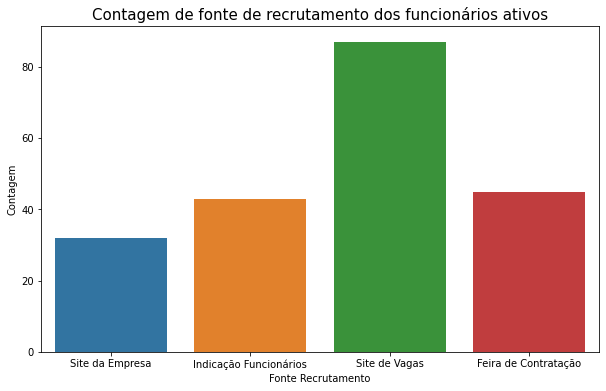

In [757]:
#Gerando gráfico de contagem para fonte de recrutamento dos funcionários ativos na empresa
plt.figure(figsize=(10,6))
sns.countplot(empregado_df['Fonte Recrutamento'])
plt.title("Contagem de fonte de recrutamento dos funcionários ativos", fontsize=15)
plt.ylabel('Contagem');

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


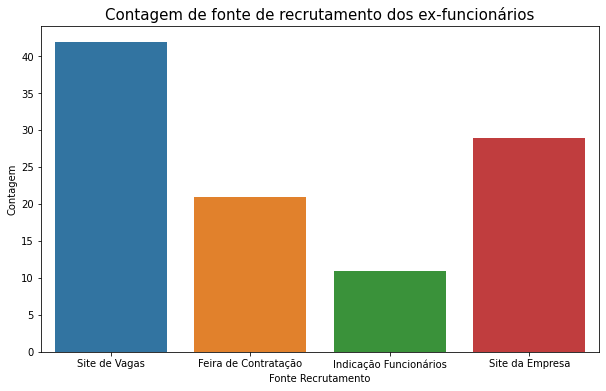

In [758]:
#Gerando gráfico de contagem de fonte de recrutamento para ex-funcionários
plt.figure(figsize=(10,6))
sns.countplot(demitido_df['Fonte Recrutamento'])
plt.title("Contagem de fonte de recrutamento dos ex-funcionários", fontsize=15)
plt.ylabel('Contagem');

In [759]:
#Estatísticas dos ex-funcionários que foram contratados pelo site da empresa
demitido_df[demitido_df['Fonte Recrutamento'] == 'Site da Empresa'].describe()

,Salário Mensal Corrigido,SpecialProjectsCount,idade,idade_demissao
count,29.000000,29.0,29.000000,29.000000
mean,5281.551724,0.0,34.517241,32.862069
std,2382.244254,0.0,7.854119,7.614479
min,3300.000000,0.0,25.000000,23.000000
25%,3960.000000,0.0,28.000000,27.000000
50%,4620.000000,0.0,33.000000,31.000000
75%,5500.000000,0.0,40.000000,39.000000
max,13255.000000,0.0,50.000000,48.000000


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda

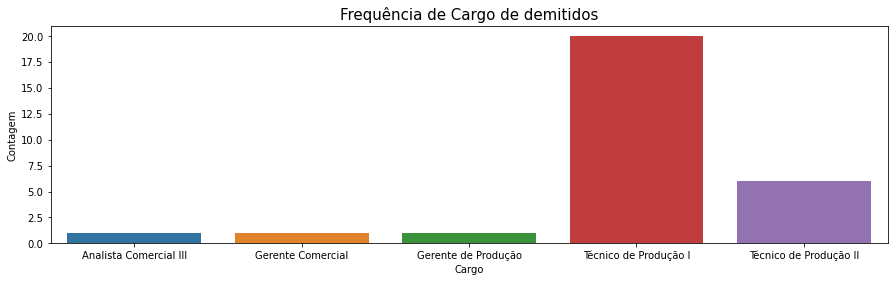

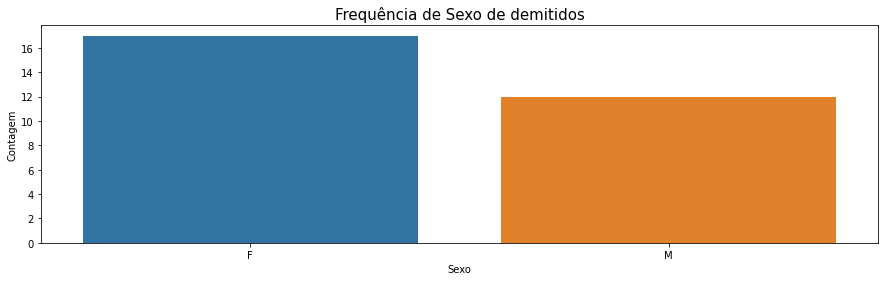

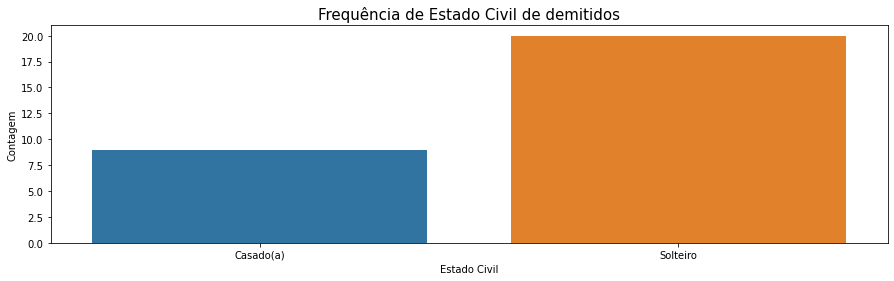

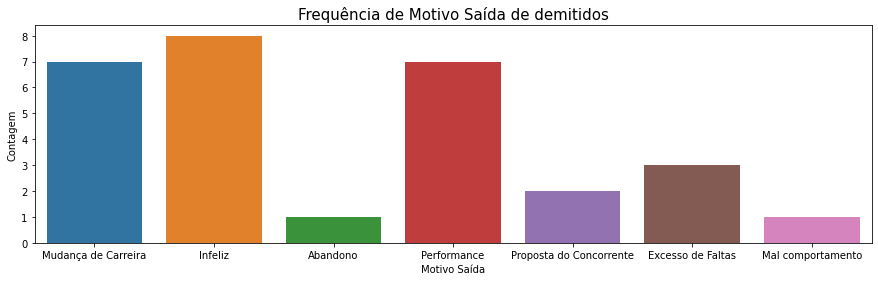

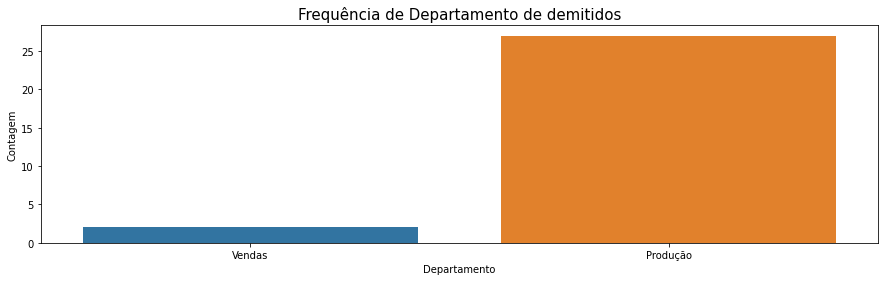

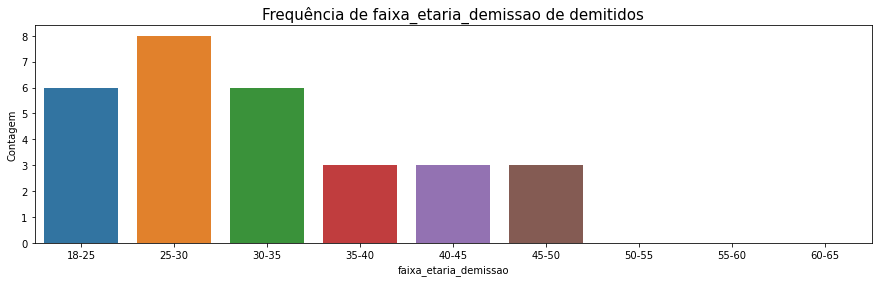

In [760]:
#Criando gráficos para diferentes variáveis tendo como base os ex=funcionários empregados pelo site da empresa
for col in ['Cargo', 'Sexo', 'Estado Civil', 'Motivo Saída', 'Departamento', 'faixa_etaria_demissao']:
    plt.subplots(1, figsize=(15,4))
    sns.countplot(demitido_df[demitido_df['Fonte Recrutamento'] == 'Site da Empresa'][col])
    plt.title('Frequência de {} de demitidos'.format(col), fontsize=15)
    plt.ylabel('Contagem');

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda

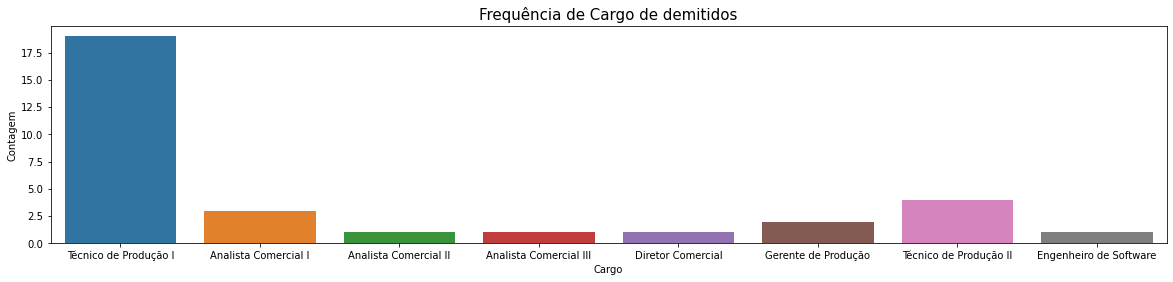

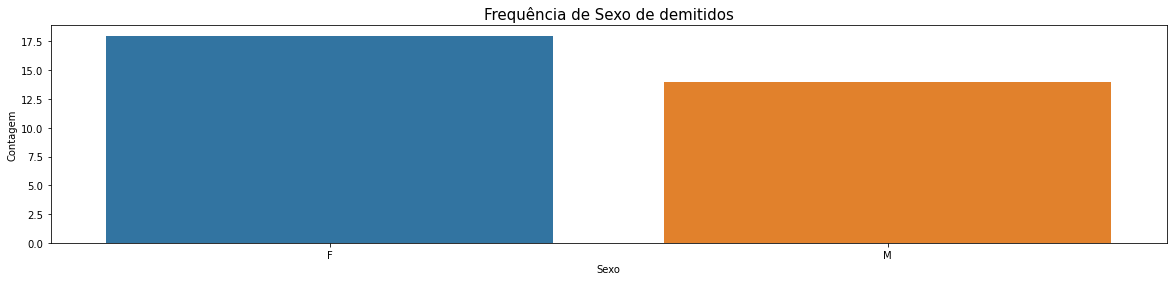

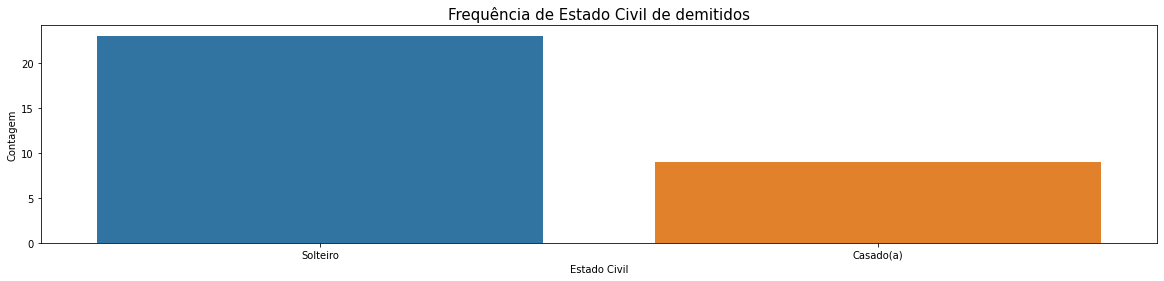

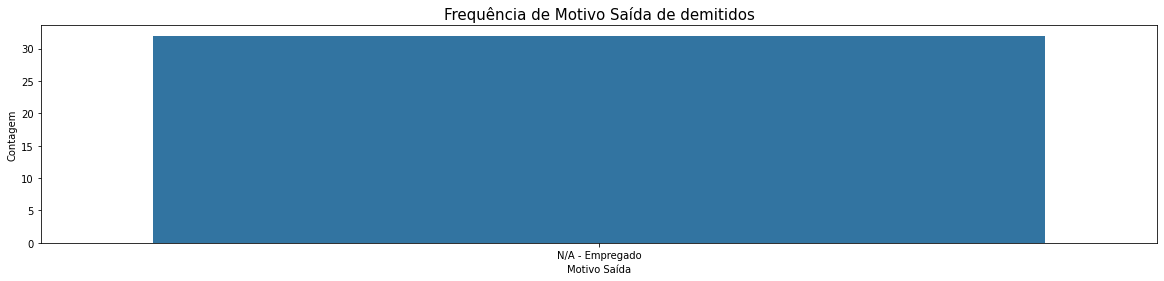

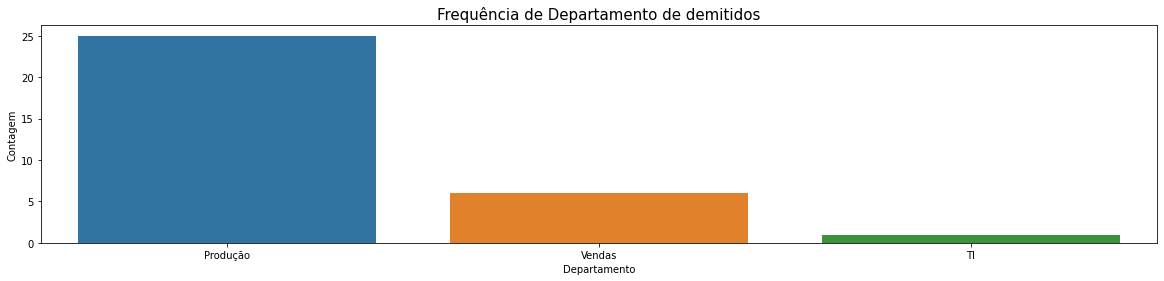

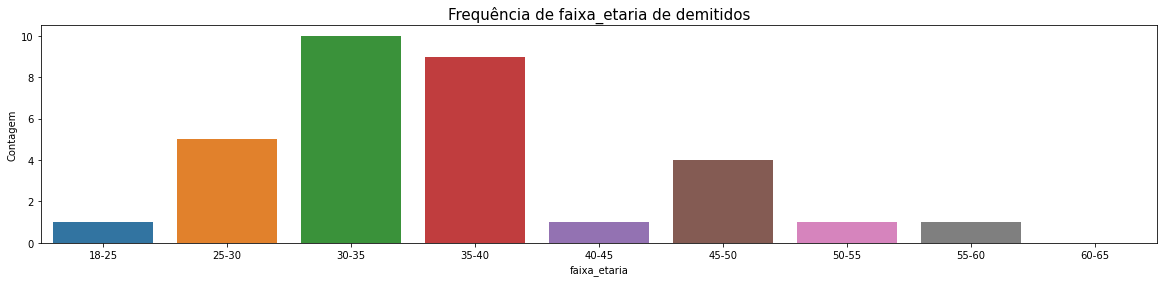

In [761]:
#Criando gráficos para diferentes variáveis tendo como base os ex=funcionários empregados pelo site da empresa
for col in ['Cargo', 'Sexo', 'Estado Civil', 'Motivo Saída', 'Departamento', 'faixa_etaria']:
    plt.subplots(1, figsize=(20,4))
    sns.countplot(empregado_df[empregado_df['Fonte Recrutamento'] == 'Site da Empresa'][col])
    plt.title('Frequência de {} de demitidos'.format(col), fontsize=15)
    plt.ylabel('Contagem');

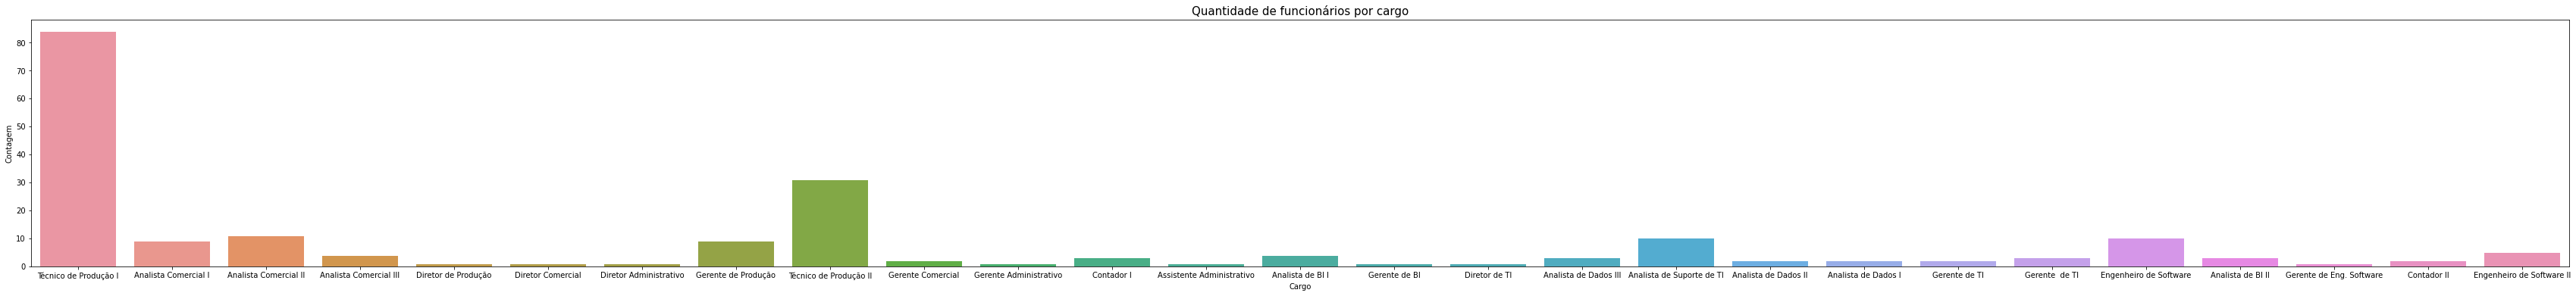

In [762]:
#Contagem de ocupação por cargo
plt.figure(figsize=(60,6))
sns.countplot(empregado_df['Cargo'])
plt.title("Quantidade de funcionários por cargo", fontsize=15)
plt.ylabel('Contagem');

In [763]:
#Resumo estatístico - I Production technician
empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'].describe() 

,Salário Mensal Corrigido,SpecialProjectsCount,idade,idade_demissao
count,84.000000,84.0,84.000000,84.0
mean,4225.071429,0.0,36.000000,0.0
std,658.119167,0.0,7.950146,0.0
min,3080.000000,0.0,22.000000,0.0
25%,3643.750000,0.0,30.000000,0.0
50%,4372.500000,0.0,35.000000,0.0
75%,4840.000000,0.0,40.000000,0.0
max,5445.000000,0.0,63.000000,0.0


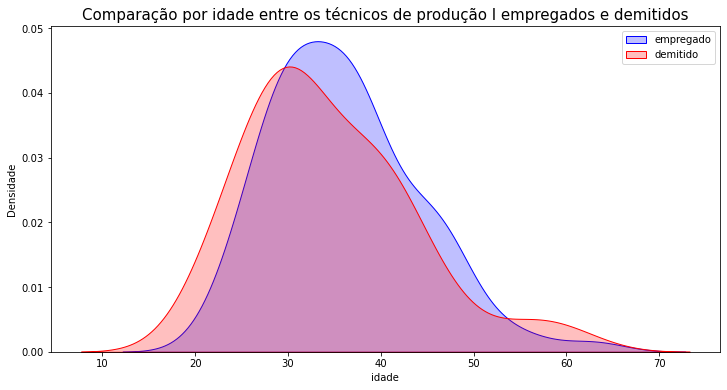

In [764]:
#Gerando gráfico de comparação por idade entre técnicos de produção (I) empregados e demitidos
plt.figure(figsize=(12, 6))
sns.kdeplot(empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I']['idade'], shade=True, color='blue', label='empregado')
sns.kdeplot(demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I']['idade_demissao'], shade=True, color='red', label='demitido')
plt.legend()
plt.title('Comparação por idade entre os técnicos de produção I empregados e demitidos', fontsize=15)
plt.ylabel('Densidade');

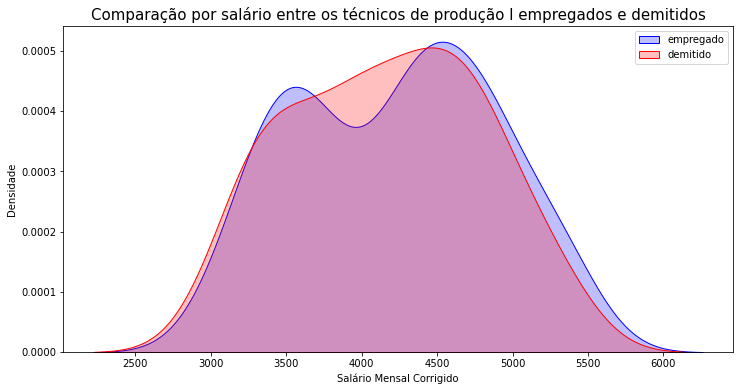

In [765]:
#Gerando gráfico de comparação por salário entre técnicos de produção (I) empregados e demitidos
plt.figure(figsize=(12, 6))
sns.kdeplot(empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I']['Salário Mensal Corrigido'], shade=True, color='blue', label='empregado')
sns.kdeplot(demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I']['Salário Mensal Corrigido'], shade=True, color='red', label='demitido')
plt.legend()
plt.title('Comparação por salário entre os técnicos de produção I empregados e demitidos', fontsize=15)
plt.ylabel('Densidade');

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


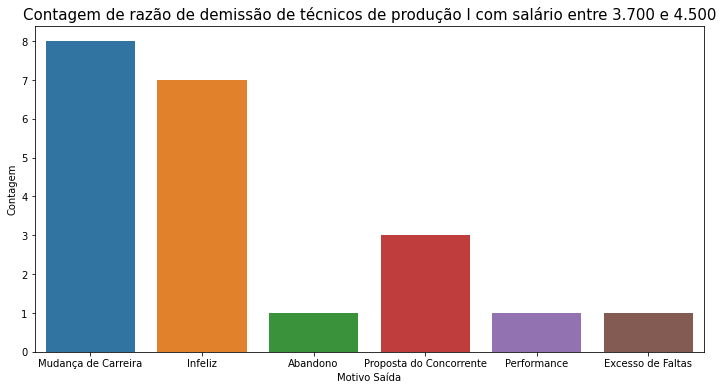

In [766]:
#Gerando gráfico para contagem de razão de demissão de técnicos de produção I com salário entre R$ 3.700 e R$ 4.500
plt.figure(figsize=(12, 6))
sns.countplot(demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I']['Motivo Saída'][demitido_df['Salário Mensal Corrigido'] > 3700][demitido_df['Salário Mensal Corrigido'] < 4500])
plt.title('Contagem de razão de demissão de técnicos de produção I com salário entre 3.700 e 4.500', fontsize=15)
plt.ylabel('Contagem');

In [767]:
#Estatísticas sobre os técnicos I empregados com idade acima de 29 e abaixo 42 anos
empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['idade'] > 29][empregado_df['idade'] < 42].describe()

<ipython-input-767-6ecaef766819>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['idade'] > 29][empregado_df['idade'] < 42].describe()
<ipython-input-767-6ecaef766819>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['idade'] > 29][empregado_df['idade'] < 42].describe()


,Salário Mensal Corrigido,SpecialProjectsCount,idade,idade_demissao
count,47.000000,47.0,47.000000,47.0
mean,4255.872340,0.0,35.191489,0.0
std,680.261446,0.0,3.366318,0.0
min,3080.000000,0.0,30.000000,0.0
25%,3713.500000,0.0,32.000000,0.0
50%,4400.000000,0.0,35.000000,0.0
75%,4840.000000,0.0,37.500000,0.0
max,5445.000000,0.0,41.000000,0.0


In [768]:
#Estatísticas sobre os técnicos I demitidos com idade acima de 29 e abaixo de 42 anos 
demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['idade_demissao'] > 29][demitido_df['idade_demissao'] < 42].describe()

<ipython-input-768-348615a9d910>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['idade_demissao'] > 29][demitido_df['idade_demissao'] < 42].describe()
<ipython-input-768-348615a9d910>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['idade_demissao'] > 29][demitido_df['idade_demissao'] < 42].describe()


,Salário Mensal Corrigido,SpecialProjectsCount,idade,idade_demissao
count,25.000000,25.0,25.000000,25.00000
mean,4129.400000,0.0,36.720000,35.32000
std,664.931575,0.0,4.026164,3.86997
min,3300.000000,0.0,31.000000,30.00000
25%,3355.000000,0.0,33.000000,32.00000
50%,4180.000000,0.0,37.000000,34.00000
75%,4620.000000,0.0,40.000000,39.00000
max,5280.000000,0.0,44.000000,41.00000


In [769]:
#Estatísticas sobre os técnicos I empregados com salário acima de 3700 e abaixo de 4500
empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['Salário Mensal Corrigido'] > 3700][empregado_df['Salário Mensal Corrigido'] < 4500].describe()

<ipython-input-769-07c2a3b6b71a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['Salário Mensal Corrigido'] > 3700][empregado_df['Salário Mensal Corrigido'] < 4500].describe()
<ipython-input-769-07c2a3b6b71a>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empregado_df[empregado_df['Cargo'] == 'Técnico de Produção I'][empregado_df['Salário Mensal Corrigido'] > 3700][empregado_df['Salário Mensal Corrigido'] < 4500].describe()


,Salário Mensal Corrigido,SpecialProjectsCount,idade,idade_demissao
count,30.000000,30.0,30.000000,30.0
mean,4137.833333,0.0,34.500000,0.0
std,273.166879,0.0,7.219466,0.0
min,3740.000000,0.0,22.000000,0.0
25%,3795.000000,0.0,29.000000,0.0
50%,4180.000000,0.0,33.500000,0.0
75%,4400.000000,0.0,39.750000,0.0
max,4400.000000,0.0,50.000000,0.0


In [770]:
#Estatísticas sobre os técnicos I demitidos com salário acima de 3700 e abaixo de 4500
demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['Salário Mensal Corrigido'] > 3700][demitido_df['Salário Mensal Corrigido'] > 4500].describe()

<ipython-input-770-c9aa3003aafb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['Salário Mensal Corrigido'] > 3700][demitido_df['Salário Mensal Corrigido'] > 4500].describe()
<ipython-input-770-c9aa3003aafb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demitido_df[demitido_df['Cargo'] == 'Técnico de Produção I'][demitido_df['Salário Mensal Corrigido'] > 3700][demitido_df['Salário Mensal Corrigido'] > 4500].describe()


,Salário Mensal Corrigido,SpecialProjectsCount,idade,idade_demissao
count,18.000000,18.0,18.000000,18.000000
mean,4858.333333,0.0,35.388889,34.388889
std,250.980430,0.0,7.130208,6.971698
min,4620.000000,0.0,26.000000,25.000000
25%,4620.000000,0.0,28.500000,28.250000
50%,4840.000000,0.0,34.500000,33.500000
75%,5005.000000,0.0,40.750000,40.000000
max,5280.000000,0.0,49.000000,48.000000


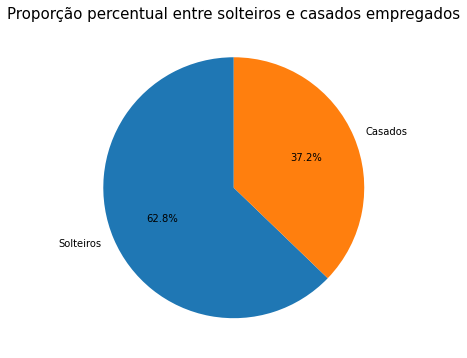

In [771]:
#Criando área de plotagem
fig, ax = plt.subplots(figsize=(6,6))

#Gerando gráfico de pizza
ax.pie([len(empregado_df[empregado_df['Estado Civil'] == 'Solteiro']), len(empregado_df[empregado_df['Estado Civil'] == 'Casado(a)'])],
       autopct='%1.1f%%', startangle=90, labels=['Solteiros', 'Casados'])
plt.title('Proporção percentual entre solteiros e casados empregados', fontsize=15);

In [772]:
#Quantidade de empregados solteiros
len(empregado_df[empregado_df['Estado Civil'] == 'Solteiro'])

130

In [773]:
#Quantidade de empregados casados
empregado_df[empregado_df['Estado Civil'] == 'Casado(a)'].shape[0]

77

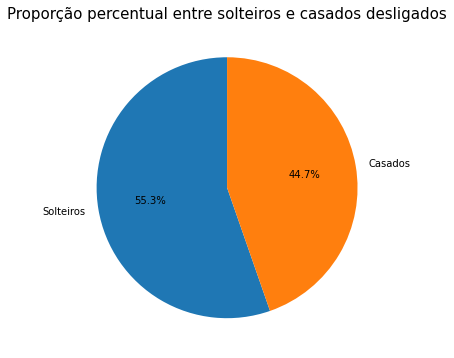

In [774]:
#Criando área de plotagem
fig, ax = plt.subplots(figsize=(6,6))

#Criando gráfico de pizza
ax.pie([len(demitido_df[demitido_df['Estado Civil'] == 'Solteiro']), len(demitido_df[demitido_df['Estado Civil'] == 'Casado(a)'])],
       autopct='%1.1f%%', startangle=90, labels=['Solteiros', 'Casados'])
plt.title('Proporção percentual entre solteiros e casados desligados', fontsize=15);

In [775]:
#Quantidade de demitidos casados
demitido_df[demitido_df['Estado Civil'] == 'Casado(a)'].shape[0]

46

In [776]:
#Quantidade de demitidos solterios
demitido_df[demitido_df['Estado Civil'] == 'Solteiro'].shape[0]

57

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


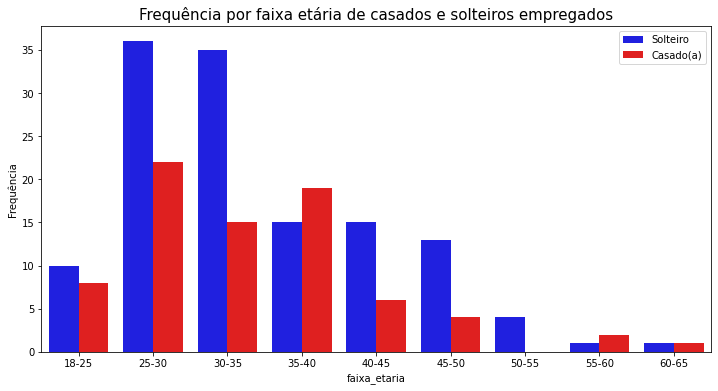

In [777]:
#Gerando gráfico de frequência de estado civil de empregados por faixa etária
plt.figure(figsize=(12,6))
sns.countplot(empregado_df['faixa_etaria'], hue=empregado_df['Estado Civil'], palette=['blue', 'red'])
plt.title('Frequência por faixa etária de casados e solteiros empregados', fontsize=15)
plt.ylabel('Frequência')
plt.legend();

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


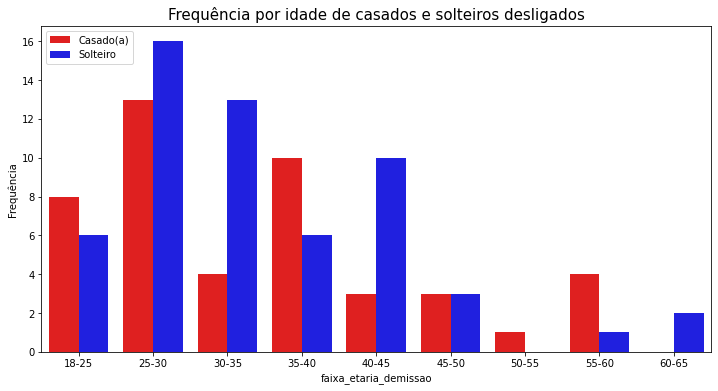

In [778]:
#Gerando gráfico de frequência de estado civil de demitidos por faixa etária
plt.figure(figsize=(12,6))
sns.countplot(demitido_df['faixa_etaria_demissao'], hue=demitido_df['Estado Civil'], palette=['red', 'blue'])
plt.title('Frequência por idade de casados e solteiros desligados', fontsize=15)
plt.ylabel('Frequência')
plt.legend();

In [779]:
#Contagem de empregados
empregado_df.shape[0]

207

In [780]:
#Contagem de demitidos
demitido_df.shape[0]

103

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


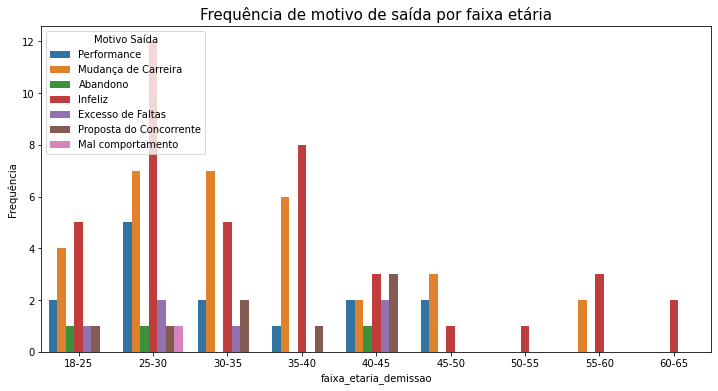

In [781]:
#Gerando gráfico de frequência de motido de saída por faixa etária
plt.figure(figsize=(12,6))
sns.countplot(demitido_df['faixa_etaria_demissao'], hue=demitido_df['Motivo Saída'])
plt.title('Frequência de motivo de saída por faixa etária', fontsize=15)
plt.ylabel('Frequência');

In [782]:
#Buscando informações de ex-funcionários que se enquadram na faixa etária 30-35 - Analisando
demitido_df[demitido_df['faixa_etaria_demissao'] == '30-35'][demitido_df['Estado Civil'] == 'Casado(a)']

<ipython-input-782-92b9ae16bd6b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  demitido_df[demitido_df['faixa_etaria_demissao'] == '30-35'][demitido_df['Estado Civil'] == 'Casado(a)']


,Salário Mensal Corrigido,Cargo,Data de Nascimento,Sexo,Estado Civil,Motivo Saída,Departamento,Fonte Recrutamento,SpecialProjectsCount,Data de Contratação,Data de Saída,idade,idade_demissao,faixa_etaria,faixa_etaria_demissao
235,4840,Técnico de Produção I,1988-03-26,M,Casado(a),Infeliz,Produção,Indicação Funcionários,0,2016-01-04,2019-05-25 00:00:00,31,31.0,30-35,30-35
248,3960,Técnico de Produção I,1984-01-04,F,Casado(a),Proposta do Concorrente,Produção,Site da Empresa,0,2014-07-01,2017-11-30 00:00:00,35,33.0,30-35,30-35
270,3355,Técnico de Produção I,1986-03-25,F,Casado(a),Infeliz,Produção,Site de Vagas,0,2017-05-06,2017-09-25 00:00:00,33,31.0,30-35,30-35
293,5720,Técnico de Produção II,1983-11-24,M,Casado(a),Mudança de Carreira,Produção,Feira de Contratação,0,2016-08-29,2017-09-25 00:00:00,36,34.0,35-40,30-35


<ipython-input-783-f6a767932a36>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.countplot(demitido_df[demitido_df['faixa_etaria_demissao'] == '25-30'][demitido_df['Estado Civil'] == 'Casado(a)']['Motivo Saída'])
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


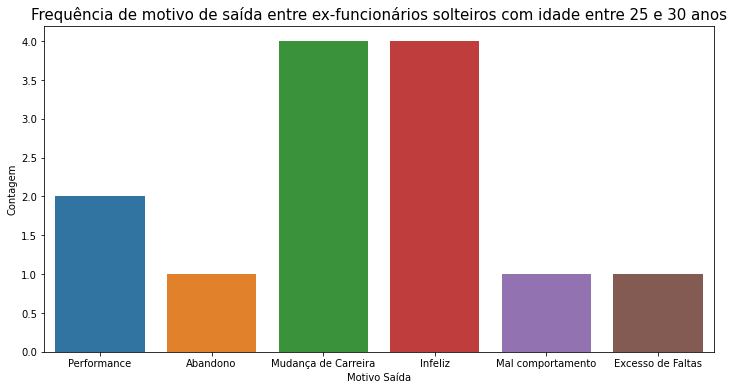

In [783]:
#Gerando gráfico de frequência de motivo de demissão de ex-funcionários solterios pertencentes à faixa etária 25-30
plt.figure(figsize=(12,6))
sns.countplot(demitido_df[demitido_df['faixa_etaria_demissao'] == '25-30'][demitido_df['Estado Civil'] == 'Casado(a)']['Motivo Saída'])
plt.title('Frequência de motivo de saída entre ex-funcionários solteiros com idade entre 25 e 30 anos', fontsize=15)
plt.ylabel('Contagem');

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


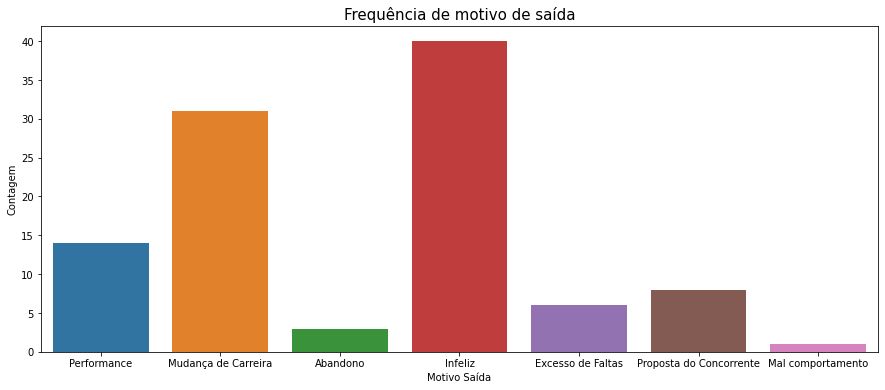

In [784]:
#Frequência de motivo de demissão
plt.figure(figsize=(15,6))
sns.countplot(demitido_df['Motivo Saída'])
plt.title('Frequência de motivo de saída', fontsize=15)
plt.ylabel('Contagem');

# 3 Correlação, modelagem de dados e continuação de análise exploratória

In [785]:
#Gerando coluna Tempo de Trabalho
info_df['tempo_de_trabalho'] = rh['Data de Saída'].dt.year - rh['Data de Contratação'].dt.year

In [786]:
np.unique(info_df['tempo_de_trabalho'], return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan

In [681]:
#Buscando índices de valores das linhas em que há empregados
index_list = []
for idx in info_df['Motivo Saída'].index:
    if info_df['Motivo Saída'][idx] == 'N/A - Empregado': #Empregados estão com ausência de valor na coluna tempo de trabalho
        index_list.append(idx)

In [797]:
#Aplicando tempo de trabalho para os empregados
info_df['ano_contratacao'] = info_df['Data de Contratação'].dt.year
for idx in index_list:
    info_df.loc[idx, ['tempo_de_trabalho']] = 2019 - info_df.loc[idx, ['ano_contratacao']][0]

In [799]:
#Observando alteração
info_df['tempo_de_trabalho']

0      4.0
1      4.0
2      2.0
3      1.0
4      2.0
      ... 
305    1.0
306    0.0
307    6.0
308    1.0
309    3.0
Name: tempo_de_trabalho, Length: 310, dtype: float64

In [801]:
#Gerando correlação
corr_matrix = info_df.corr()
corr_matrix

,Salário Mensal Corrigido,SpecialProjectsCount,idade,idade_demissao,tempo_de_trabalho,ano_contratacao
Salário Mensal Corrigido,1.000000,0.538697,0.023549,-0.113411,-0.052493,0.125372
SpecialProjectsCount,0.538697,1.000000,-0.089448,-0.141873,-0.230632,0.309248
idade,0.023549,-0.089448,1.000000,0.295229,0.059660,-0.086125
idade_demissao,-0.113411,-0.141873,0.295229,1.000000,-0.121536,-0.224938
tempo_de_trabalho,-0.052493,-0.230632,0.059660,-0.121536,1.000000,-0.883721
ano_contratacao,0.125372,0.309248,-0.086125,-0.224938,-0.883721,1.000000


In [803]:
#Gerando dummies para análise
dummy_df0 = pd.get_dummies(info_df['Cargo'])
info_dummy_df0 = pd.concat([info_df, dummy_df0], axis=1)
dummy_df1 = pd.get_dummies(info_df['faixa_etaria_demissao'])
info_dummy_df1 = pd.concat([info_dummy_df0, dummy_df1], axis=1)
dummy_df2 = pd.get_dummies(info_df['Sexo'])
info_dummy_df2 = pd.concat([info_dummy_df1, dummy_df2], axis=1)
dummy_df3 = pd.get_dummies(info_df['Estado Civil'])
info_dummy_df3 = pd.concat([info_dummy_df2, dummy_df3], axis=1)
dummy_df4 = pd.get_dummies(info_df['Motivo Saída'])
info_dummy_df4 = pd.concat([info_dummy_df3, dummy_df4], axis=1)
dummy_df5 = pd.get_dummies(info_df['Departamento'])
info_dummy_df5 = pd.concat([info_dummy_df4, dummy_df5], axis=1)
dummy_df6 = pd.get_dummies(info_df['Fonte Recrutamento'])
info_dummy_df6 = pd.concat([info_dummy_df5, dummy_df6], axis=1)
dummy_df7 = pd.get_dummies(info_df['faixa_etaria'])
info_dummy_df7 = pd.concat([info_dummy_df6, dummy_df7], axis=1)

In [804]:
#Verificando colunas
info_dummy_df7.columns

Index(['Salário Mensal Corrigido', 'Cargo', 'Data de Nascimento', 'Sexo',
       'Estado Civil', 'Motivo Saída', 'Departamento', 'Fonte Recrutamento',
       'SpecialProjectsCount', 'Data de Contratação', 'Data de Saída', 'idade',
       'idade_demissao', 'faixa_etaria', 'faixa_etaria_demissao',
       'tempo_de_trabalho', 'ano_contratacao', 'Analista Comercial I',
       'Analista Comercial II', 'Analista Comercial III', 'Analista de BI I',
       'Analista de BI II', 'Analista de Dados I', 'Analista de Dados II',
       'Analista de Dados III', 'Analista de Suporte de TI',
       'Assistente Administrativo', 'Auxiliar de Suporte de TI', 'Contador I',
       'Contador II', 'Diretor Administrativo', 'Diretor Comercial',
       'Diretor de Produção', 'Diretor de TI', 'Engenheiro de Software',
       'Engenheiro de Software II', 'Gerente  de TI', 'Gerente Administrativo',
       'Gerente Comercial', 'Gerente de BI', 'Gerente de Eng. Software',
       'Gerente de Produção', 'Gerente de TI

In [812]:
#Criando coluna de qualidade de tempo de trabalho
positivo = 1
negativo = 0
qualidade_tempo_trabalho = [] #Lista para receber ambos os valores
for tempo in info_dummy_df6['tempo_de_trabalho']:
    if tempo >= 2: #Tempo de trabalho igual ou acima de 2 anos é positivo (1)
        qualidade_tempo_trabalho.append(positivo)
    else: #Tempo de trabalho igual ou acima de 2 anos é negativo (0)
        qualidade_tempo_trabalho.append(negativo)

#Criando nova coluna para qualidade de tempo de trabalho
info_dummy_df7['qualidade_tempo_trabalho'] = qualidade_tempo_trabalho

In [813]:
#Conferindo criação
info_dummy_df7['qualidade_tempo_trabalho'].head()

0    1
1    1
2    1
3    0
4    1
Name: qualidade_tempo_trabalho, dtype: int64

In [814]:
#Conferindo estrutura de dados
info_dummy_df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 84 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Salário Mensal Corrigido   310 non-null    int64         
 1   Cargo                      310 non-null    object        
 2   Data de Nascimento         310 non-null    datetime64[ns]
 3   Sexo                       310 non-null    object        
 4   Estado Civil               310 non-null    object        
 5   Motivo Saída               310 non-null    object        
 6   Departamento               310 non-null    object        
 7   Fonte Recrutamento         310 non-null    object        
 8   SpecialProjectsCount       310 non-null    int64         
 9   Data de Contratação        310 non-null    datetime64[ns]
 10  Data de Saída              310 non-null    object        
 11  idade                      310 non-null    int64         
 12  idade_de

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


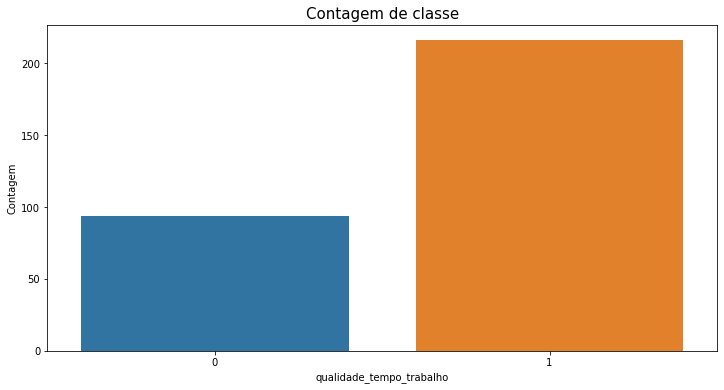

In [815]:
#Criando gráfico para contagem de classes
plt.figure(figsize=(12,6))
sns.countplot(info_dummy_df7['qualidade_tempo_trabalho'])
plt.title('Contagem de classe', fontsize=15)
plt.ylabel('Contagem');

In [816]:
#Criando correlação a partir da qualidade de tempo de trabalho
corr_matrix_df = pd.DataFrame(info_dummy_df7.corr()['qualidade_tempo_trabalho'])

In [826]:
#Buscando correlações igual ou acima de 50% (correlação positiva) entre tempo de trabalho e demais variáveis
corr_matrix_df[corr_matrix_df['qualidade_tempo_trabalho'] >= 0.5]

,qualidade_tempo_trabalho
tempo_de_trabalho,0.714727
N/A - Empregado,0.205130
qualidade_tempo_trabalho,1.000000


In [827]:
#Buscando correlações igual ou menor do que -50% (correlação negativa) entre qualidade de tempo de trabalho e demais variáveis
corr_matrix_df[corr_matrix_df['qualidade_tempo_trabalho'] <= -0.5]

,qualidade_tempo_trabalho
ano_contratacao,-0.606516


In [828]:
#Criando correlação após dummyzação
gen_corr_matrix_df = pd.DataFrame(info_dummy_df7.corr())

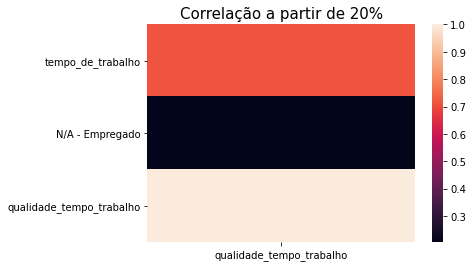

In [831]:
#Correlação a partir de 30% (positivo)
sns.heatmap(corr_matrix_df[corr_matrix_df['qualidade_tempo_trabalho'] >= 0.2])
plt.title('Correlação a partir de 20%', fontsize=15);

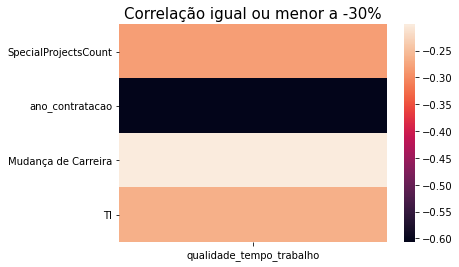

In [833]:
#Correlação igual ou menor do que -20% (negativo)
sns.heatmap(corr_matrix_df[corr_matrix_df['qualidade_tempo_trabalho'] <= -0.2])
plt.title('Correlação igual ou menor a -30%', fontsize=15);

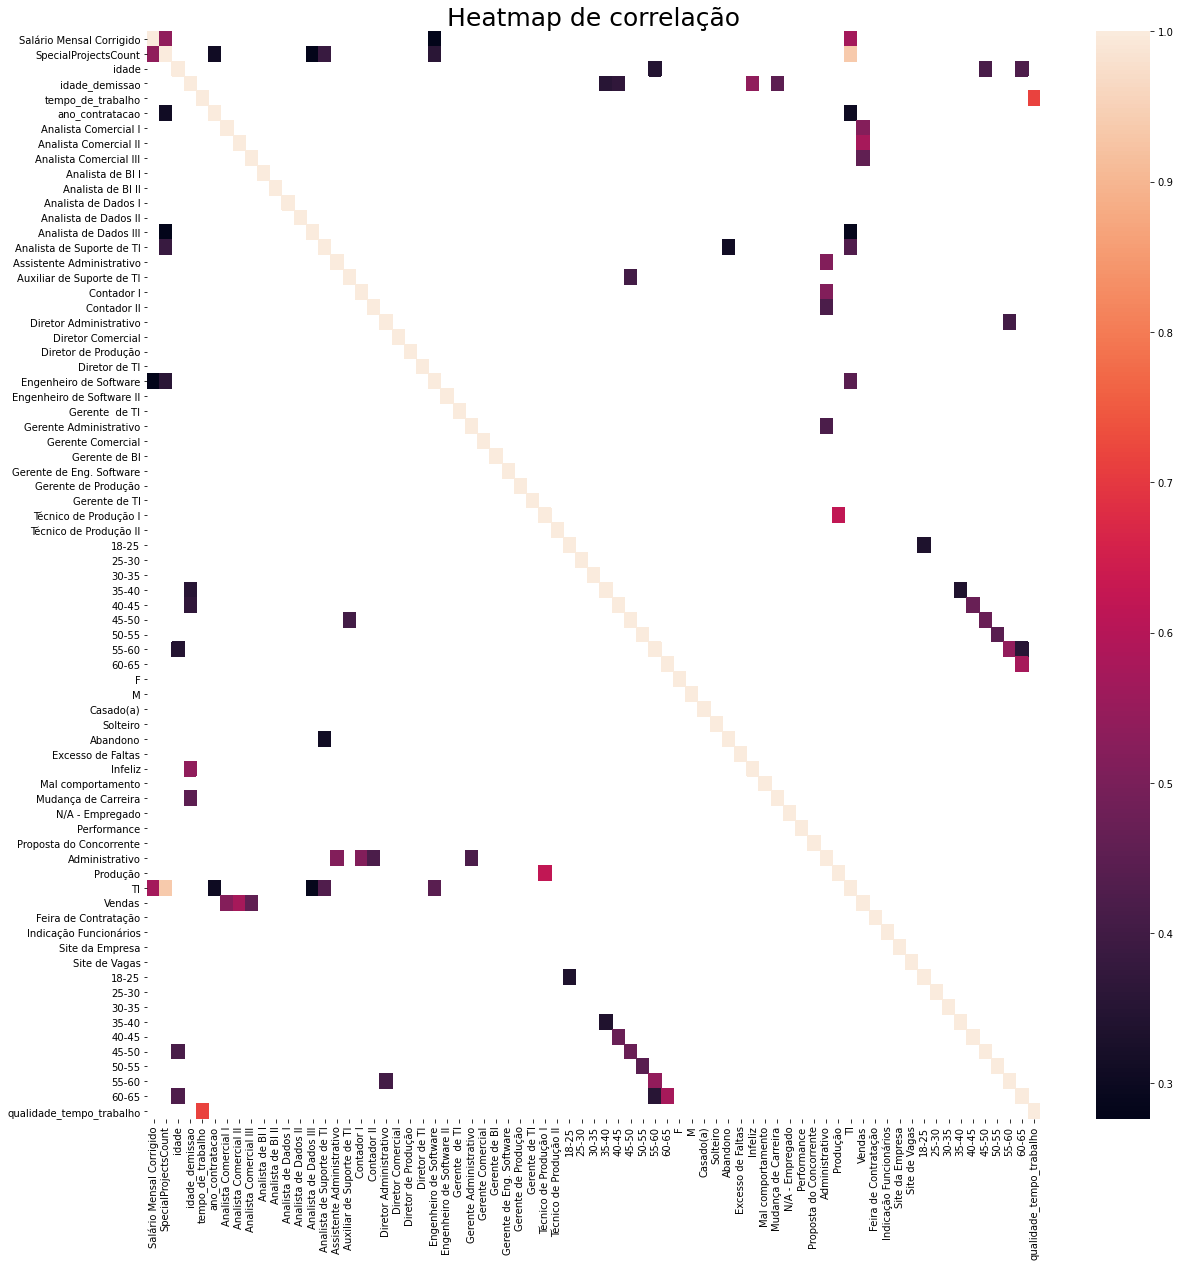

In [834]:
#Gerando gráfico heatmap para análise de correlação
plt.figure(figsize=(20,20))
sns.heatmap(gen_corr_matrix_df[gen_corr_matrix_df.corr() >= 0.5]) #Correlação positiva a partir de 50%
plt.title('Heatmap de correlação', fontsize=25); 

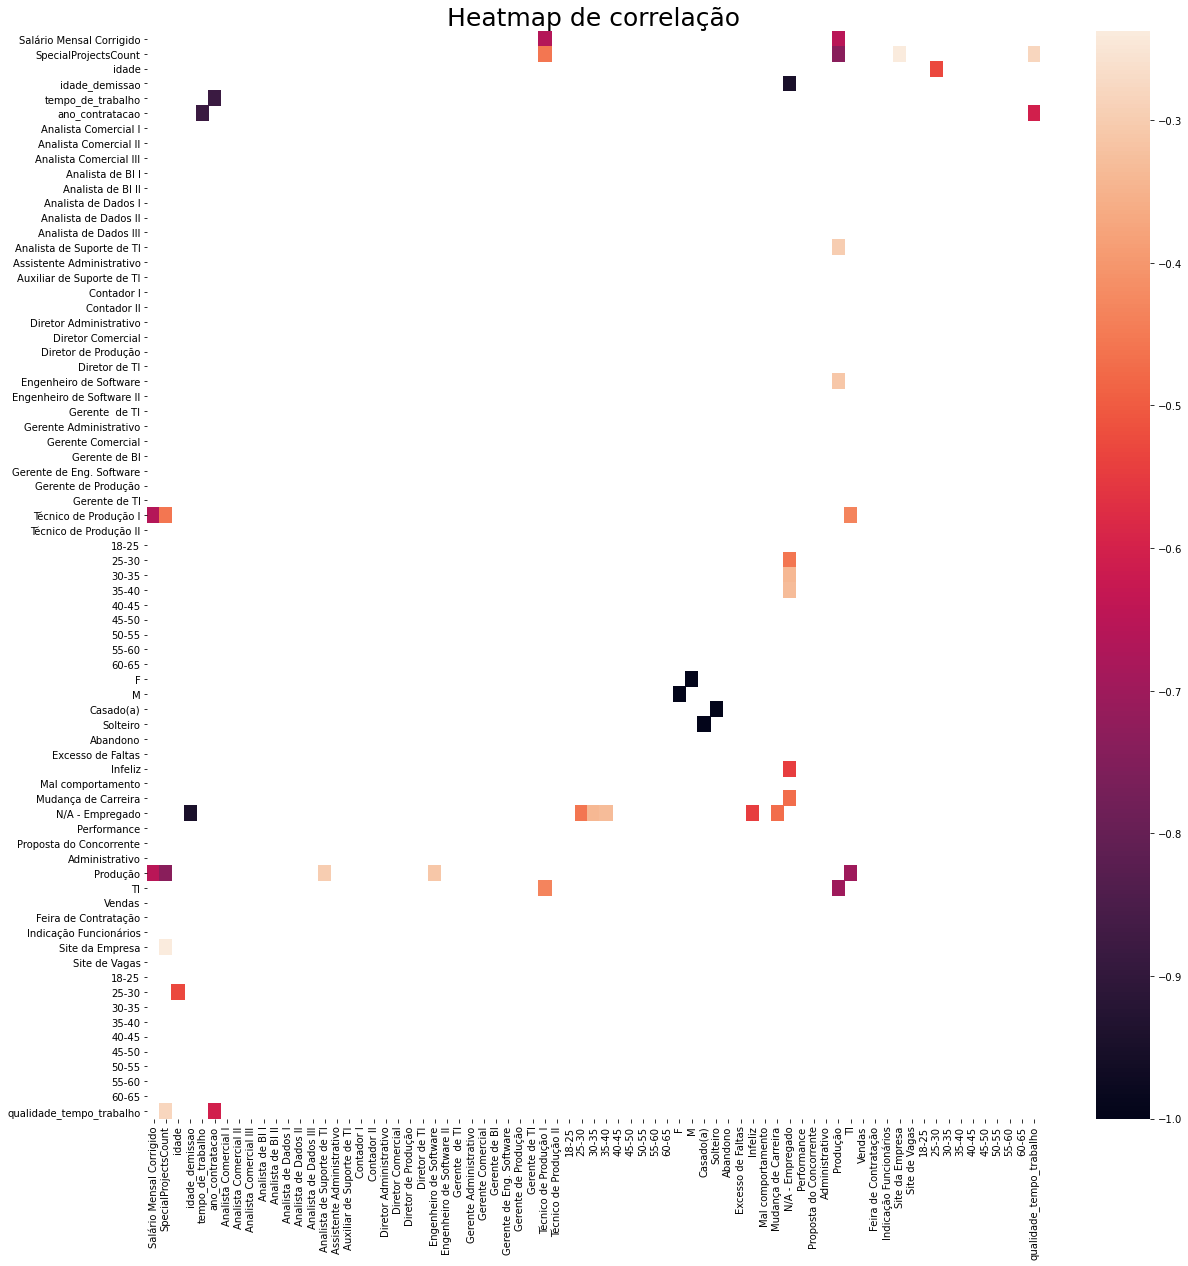

In [835]:
plt.figure(figsize=(20,20))
sns.heatmap(gen_corr_matrix_df[gen_corr_matrix_df.corr() <= -0.5]) #Correlação negativa igual ou menor do que 50%
plt.title('Heatmap de correlação', fontsize=25); 

In [836]:
#Chamando correlações positivas a partir de 40% - Variável Qualidade Tempo de Trabalho
gen_corr_matrix_df[gen_corr_matrix_df['qualidade_tempo_trabalho'] >= 0.4]['qualidade_tempo_trabalho']

tempo_de_trabalho           0.714727
qualidade_tempo_trabalho    1.000000
Name: qualidade_tempo_trabalho, dtype: float64

In [837]:
#Chamando correlações negativas iguais ou menor do que 40% - Variável Qualidade Tempo de Trabalho
gen_corr_matrix_df[gen_corr_matrix_df['qualidade_tempo_trabalho'] <= -0.4]['qualidade_tempo_trabalho']

ano_contratacao   -0.606516
Name: qualidade_tempo_trabalho, dtype: float64

# 4 Pré-processamento

In [839]:
#Porcentagem de presença de cada classe concernente a qualidade de tempo de trabalho
classe_zero = len(info_dummy_df6[info_dummy_df7['qualidade_tempo_trabalho'] == 0])
classe_um= len(info_dummy_df6[info_dummy_df7['qualidade_tempo_trabalho'] == 1])
print('Há {}% da classe zero'.format(round(classe_zero/len(info_dummy_df7)*100, 2)))
print('Há {}% da classe um'.format(round(classe_um/len(info_dummy_df7)*100, 2)))

Há 30.32% da classe zero
Há 69.68% da classe um


In [840]:
#Conferindo total
len(info_dummy_df7)

310

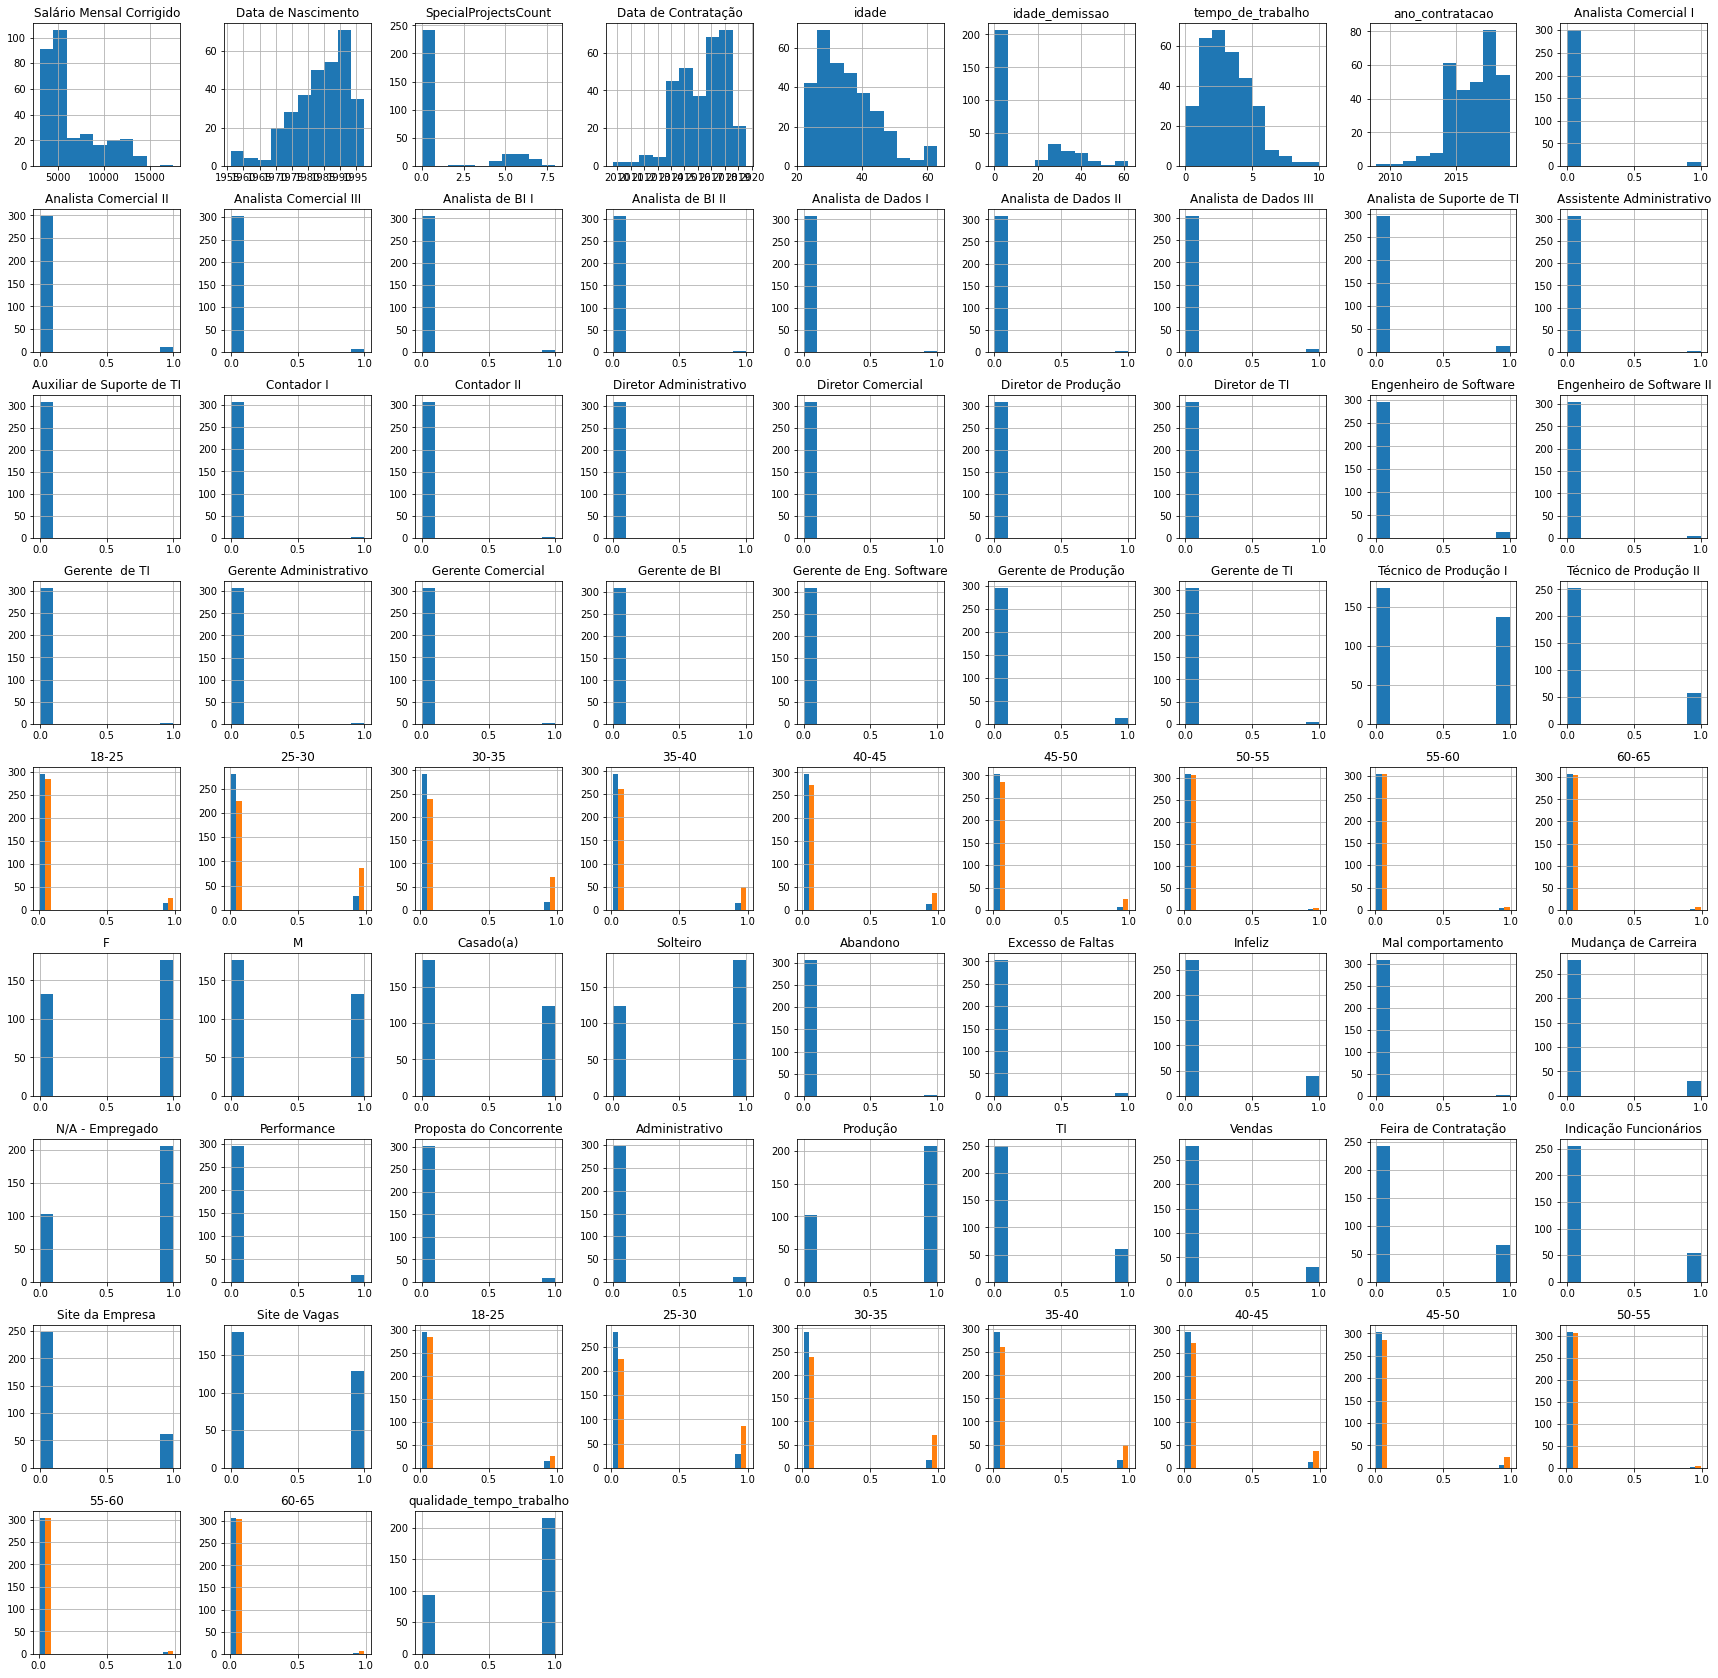

In [841]:
#Analisando distribuição
info_dummy_df7.hist(figsize=(30,30));

In [842]:
#Separando colunas para aplicação de one hot
categoricas_df = info_df.loc[:,['Cargo', 'Sexo', 'Estado Civil', 'Motivo Saída', 'Fonte Recrutamento']]

#Visualizando
categoricas_df.head()

,Cargo,Sexo,Estado Civil,Motivo Saída,Fonte Recrutamento
0,Técnico de Produção I,F,Solteiro,N/A - Empregado,Site da Empresa
1,Técnico de Produção I,M,Solteiro,N/A - Empregado,Indicação Funcionários
2,Técnico de Produção I,M,Casado(a),N/A - Empregado,Site de Vagas
3,Técnico de Produção I,M,Casado(a),N/A - Empregado,Site de Vagas
4,Técnico de Produção I,F,Solteiro,N/A - Empregado,Feira de Contratação


In [850]:
#Tirando variáveis categóricas para restar somente as numéricas
numericas_df = info_df.drop(['Cargo', 'Sexo', 'Estado Civil', 'Motivo Saída', 'Fonte Recrutamento',
                         'faixa_etaria', 'faixa_etaria_demissao', 'Data de Nascimento', 'Departamento', 'Data de Contratação',
                            'Data de Saída', 'idade', 'ano_contratacao'], axis=1)

#Aplicando coluna Tempo de Trbalho
numericas_df['tempo_de_trabalho'] = info_dummy_df7['tempo_de_trabalho']

#Visualizando
numericas_df.head()

,Salário Mensal Corrigido,SpecialProjectsCount,idade_demissao,tempo_de_trabalho
0,5060,0,0.0,4.0
1,3520,0,0.0,4.0
2,4400,0,0.0,2.0
3,3960,0,0.0,1.0
4,3520,0,0.0,2.0


In [856]:
#Importando OneHotEncoder e StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Criação de objeto One Hot
onehot = OneHotEncoder(sparse=False)

#Criação do objeto Scaler
scaler = StandardScaler()

In [857]:
#Aplicando onehot
onehot_aplicado = onehot.fit_transform(categoricas_df)
onehot_aplicado

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [858]:
#Criando dataframe
onehot_aplicado_df = pd.DataFrame(onehot_aplicado)
onehot_aplicado_df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
306,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [859]:
#Concatenando colunas numéricas com colunas onehots
final_df = pd.concat([numericas_df, onehot_aplicado_df],axis=1)
final_df.head()

,Salário Mensal Corrigido,SpecialProjectsCount,idade_demissao,tempo_de_trabalho,0,1,2,3,4,5,...,34,35,36,37,38,39,40,41,42,43
0,5060,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3520,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4400,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3960,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3520,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [860]:
#Padronizando os dados
final_escalonado_df = scaler.fit_transform(final_df)
final_escalonado_df = pd.DataFrame(final_escalonado_df)
final_escalonado_df

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-0.463675,-0.515148,-0.667663,0.762432,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.384900,-0.056888,-0.333333,0.705397,-0.217479,-0.162758,-0.520088,-0.459279,2.020388,-0.844220
1,-0.978591,-0.515148,-0.667663,0.762432,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.384900,-0.056888,-0.333333,0.705397,-0.217479,-0.162758,-0.520088,2.177324,-0.494954,-0.844220
2,-0.684354,-0.515148,-0.667663,-0.349822,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.384900,-0.056888,-0.333333,0.705397,-0.217479,-0.162758,-0.520088,-0.459279,-0.494954,1.184526
3,-0.831472,-0.515148,-0.667663,-0.905948,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.384900,-0.056888,-0.333333,0.705397,-0.217479,-0.162758,-0.520088,-0.459279,-0.494954,1.184526
4,-0.978591,-0.515148,-0.667663,-0.349822,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.384900,-0.056888,-0.333333,0.705397,-0.217479,-0.162758,1.922751,-0.459279,-0.494954,-0.844220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.095879,-0.515148,0.987685,-0.905948,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.384900,-0.056888,3.000000,-1.417642,-0.217479,-0.162758,-0.520088,-0.459279,-0.494954,1.184526
306,-0.390116,-0.515148,1.330171,-1.462075,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,2.598076,-0.056888,-0.333333,-1.417642,-0.217479,-0.162758,1.922751,-0.459279,-0.494954,-0.844220
307,-0.463675,-0.515148,0.816442,1.874685,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,2.598076,-0.056888,-0.333333,-1.417642,-0.217479,-0.162758,-0.520088,-0.459279,-0.494954,1.184526
308,-0.316557,-0.515148,2.700114,-0.905948,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,2.598076,-0.056888,-0.333333,-1.417642,-0.217479,-0.162758,-0.520088,-0.459279,-0.494954,1.184526


# 5 Machine Learning
5.1 Dados desbalanceados

In [861]:
#Separando as variáveis preditoras
X_all_get_dummy = final_escalonado_df.values
X_all_get_dummy

array([[-0.46367542, -0.51514829, -0.66766314, ..., -0.45927933,
         2.02038789, -0.84421987],
       [-0.97859111, -0.51514829, -0.66766314, ...,  2.17732422,
        -0.49495446, -0.84421987],
       [-0.68435357, -0.51514829, -0.66766314, ..., -0.45927933,
        -0.49495446,  1.18452555],
       ...,
       [-0.46367542, -0.51514829,  0.81644191, ..., -0.45927933,
        -0.49495446,  1.18452555],
       [-0.31655666, -0.51514829,  2.70011369, ..., -0.45927933,
        -0.49495446,  1.18452555],
       [-0.46367542, -0.51514829,  1.38725154, ..., -0.45927933,
        -0.49495446,  1.18452555]])

In [862]:
#Separando a variável target
y = info_dummy_df7['qualidade_tempo_trabalho']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: qualidade_tempo_trabalho, dtype: int64

In [863]:
#Analisando 
X_all_get_dummy.shape

(310, 48)

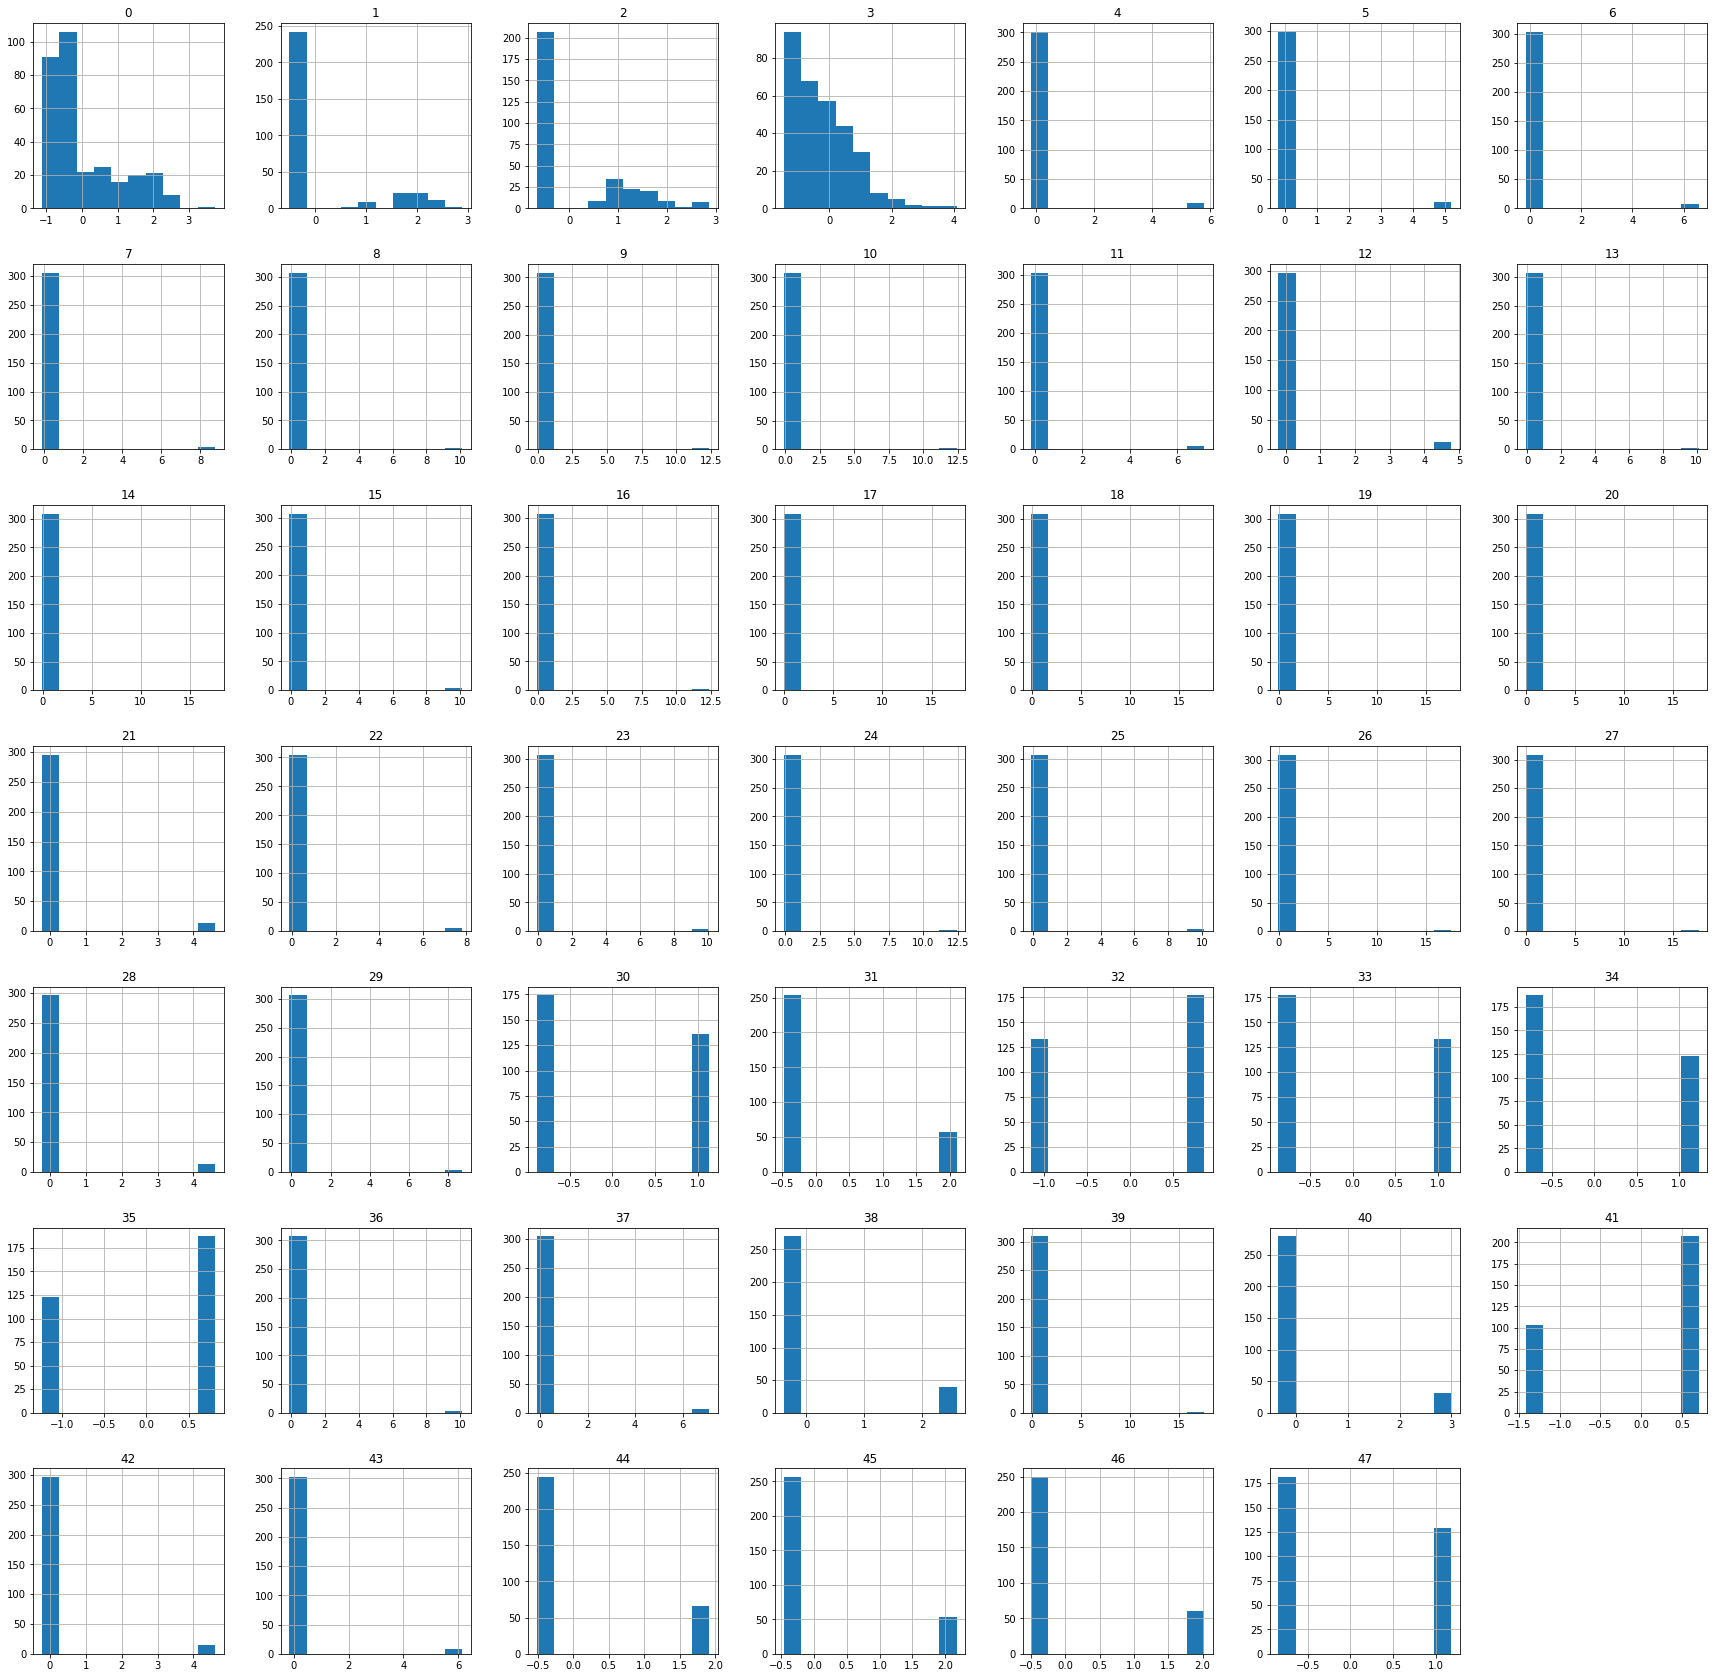

In [864]:
#Gráfico dos dados escalados
df = pd.DataFrame(X_all_get_dummy) #transformando array de variáveis preditoras em dataframe

#Gerando histograma
df.hist(figsize=(30,30)); #Visualizando escalonamento

In [116]:
#Data frame de dados padronizados
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.463675,-0.515148,0.176336,0.492673,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,-0.545042,2.307928,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
1,-0.978591,-0.515148,0.966932,0.492673,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,-0.545042,-0.433289,2.716317,-0.296174,-0.128037,-0.140488,-0.140488
2,-0.684354,-0.515148,1.305759,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,-0.619620,-0.545042,-0.433289,-0.368146,3.376389,-0.128037,-0.140488,-0.140488
3,-0.831472,-0.515148,-1.178972,-1.173456,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,3.376389,-0.619620,-0.545042,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
4,-0.978591,-0.515148,-0.162491,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,1.834720,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
5,-0.684354,-0.515148,0.515163,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,-0.619620,-0.545042,2.307928,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
6,-1.052150,-0.515148,-0.727203,-0.062704,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,1.613893,-0.545042,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
7,-0.978591,-0.515148,-1.178972,-0.618080,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,3.376389,-0.619620,-0.545042,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
8,-0.334947,-0.515148,-0.162491,-1.728833,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,-0.844220,-0.296174,-0.619620,1.834720,-0.433289,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488
9,-0.537235,-0.515148,0.063393,-0.062704,-0.172917,-0.191805,-0.151994,-0.114332,-0.098853,-0.080582,...,1.184526,-0.296174,-0.619620,-0.545042,2.307928,-0.368146,-0.296174,-0.128037,-0.140488,-0.140488


In [865]:
#Variável dependente
y

0      1
1      1
2      1
3      0
4      1
      ..
305    0
306    0
307    1
308    0
309    1
Name: qualidade_tempo_trabalho, Length: 310, dtype: int64

In [866]:
#Importando modelo de seleção para treinamento e teste
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X_all_get_dummy, y, test_size=0.2, random_state=1)

In [867]:
#Analisando repartição
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((248, 48), (62, 48), (248,), (62,))

In [868]:
#Observando variável dependente de treinamento
y_train

307    1
0      1
132    1
208    1
62     1
      ..
203    1
255    1
72     1
235    1
37     1
Name: qualidade_tempo_trabalho, Length: 248, dtype: int64

In [869]:
#Averiguando percentual de distribuição
print('Percentual de dados da base de treinamento é {} %'.format((248/(248 + 62)*100)))
print('Percentual de dados da base de teste é {} %'.format((62/(248 + 62)*100)))

Percentual de dados da base de treinamento é 80.0 %
Percentual de dados da base de teste é 20.0 %


In [870]:
#Importando modelo linear logístico
from sklearn.linear_model import LogisticRegression
logistic_0 = LogisticRegression(random_state=1)
logistic_model_0 = logistic_0.fit(X_train, y_train)

In [871]:
#Prevendo
pred_logistic_0 = logistic_model_0.predict(X_test)

In [872]:
#Resultados de predição
pred_logistic_0

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [873]:
#Valores reais
y_test = np.array(y_test)
y_test.reshape(1,-1)

array([[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]],
      dtype=int64)

In [874]:
#Importando métricas
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pred_logistic_0, y_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        19
           1       0.98      0.93      0.95        43

    accuracy                           0.94        62
   macro avg       0.92      0.94      0.93        62
weighted avg       0.94      0.94      0.94        62



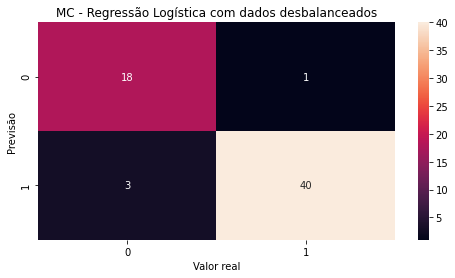

In [875]:
#Criando matriz de confusão
cm_logistic_0 = confusion_matrix(pred_logistic_0, y_test)

#Gerando gráfico heatmap
plt.figure(figsize=(8,4))
sns.heatmap(cm_logistic_0, annot=True)
plt.title('MC - Regressão Logística com dados desbalanceados', fontsize=12)
plt.ylabel('Previsão')
plt.xlabel('Valor real');

In [876]:
print('Quando o modelo previu que o funcionário estaria ao menos dois anos, ele acertou {}%'.format(round((40/(40+3)),4)*100))
print('Quando o modelo previu que o funcionário estaria ao menos dois anos, ele errou {}%'.format(round((3/(40+3)),4)*100))
print('Quando o modelo previu que o funcionário ficaria menos de dois anos, ele errou {}%'.format(round((1/(18+1)),4)*100))

Quando o modelo previu que o funcionário estaria ao menos dois anos, ele acertou 93.02%
Quando o modelo previu que o funcionário estaria ao menos dois anos, ele errou 6.98%
Quando o modelo previu que o funcionário ficaria menos de dois anos, ele errou 5.26%


5.2 Balanceamento dos dados - Oversampling

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


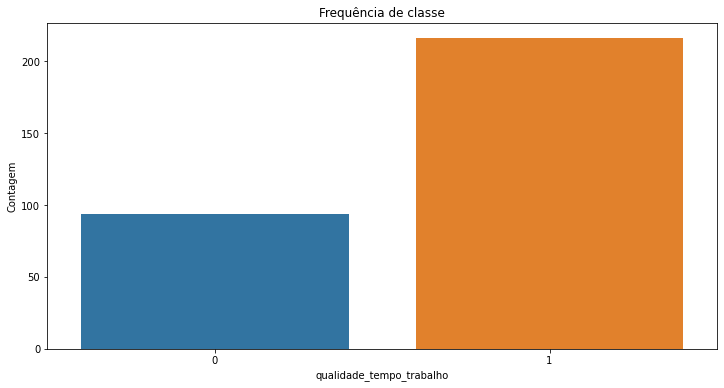

In [877]:
#Analisando o balanceamento dos dados
plt.figure(figsize=(12,6))
sns.countplot(info_dummy_df7['qualidade_tempo_trabalho'])
plt.title('Frequência de classe')
plt.ylabel('Contagem');

In [878]:
#Balanceando os dados
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_smt, y_smt =  smt.fit_resample(X_all_get_dummy, y)

In [879]:
X_all_get_dummy.shape

(310, 48)

In [880]:
#Baste de dados atualmente
X_smt.shape, y_smt.shape

((432, 48), (432,))

In [881]:
#Base de dados anteriormente
X_all_get_dummy.shape, y.shape

((310, 48), (310,))

In [882]:
#Resultado de aumento
print('Houve um aumento de amostras (sintéticas) em torno de {}%'.format(round(((432*100)/310)-100,2)))

Houve um aumento de amostras (sintéticas) em torno de 39.35%


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


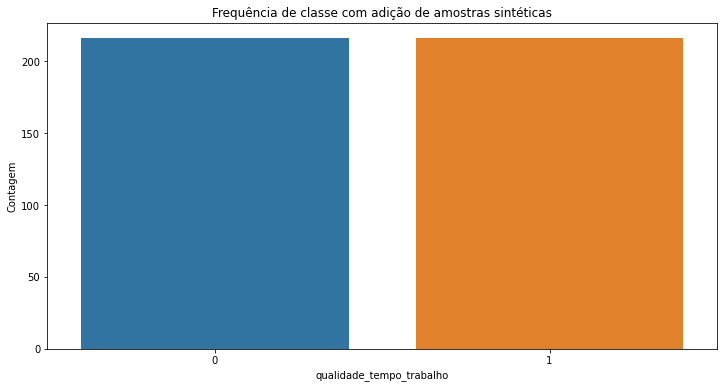

In [883]:
#Verificando correção de desbalanceamento
plt.figure(figsize=(12,6))
sns.countplot(y_smt)
plt.title('Frequência de classe com adição de amostras sintéticas')
plt.ylabel('Contagem');

In [884]:
#Separando os dados em treinamento e teste
x_smt_train, x_smt_test, y_smt_train, y_smt_test = tts(X_smt, y_smt, test_size=0.2, random_state=2)
x_smt_train.shape, x_smt_test.shape, y_smt_train.shape, y_smt_test.shape

((345, 48), (87, 48), (345,), (87,))

In [885]:
#Repartição anterior
print('Base para treinamento: {}%'.format(round((345/(345+87))*100,2)))
print('Base para teste: {}%'.format(round((87/(345+87))*100,2)))

Base para treinamento: 79.86%
Base para teste: 20.14%


In [886]:
#Treinando o modelo
logistic_smt = LogisticRegression(random_state=1)
logistic_model_smt = logistic_smt.fit(x_smt_train, y_smt_train)

In [887]:
#Prevendo
pred_logistic_smt = logistic_model_smt.predict(x_smt_test)

In [888]:
#Desempenho do modelo
print(classification_report(pred_logistic_smt, y_smt_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.98      0.98      0.98        41

    accuracy                           0.98        87
   macro avg       0.98      0.98      0.98        87
weighted avg       0.98      0.98      0.98        87



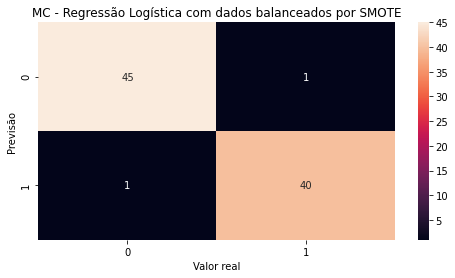

In [889]:
#Gerando matriz de confusão
cm_logistic_smt = confusion_matrix(pred_logistic_smt, y_smt_test)

#Gerando heatmap de matriz de confusão
plt.figure(figsize=(8,4))
sns.heatmap(cm_logistic_smt, annot=True)
plt.title('MC - Regressão Logística com dados balanceados por SMOTE', fontsize=12)
plt.ylabel('Previsão')
plt.xlabel('Valor real');

In [891]:
print('Quando o modelo perviu que o funcionário ficaria ao menos 2 anos, ele acertou em {}%'.format(round((40/(40+1))*100,2)))
print('Quando o modelo previu que o funcionário ficaria menos de 2 anos, ele acertou em {}%'.format(round(45/(45+1)*100,2)))
print('Quando o modelo previu que o funcionário ficaria menos de 2 anos, ele errou em {}%'.format(round(1/(45+1)*100,2)))

Quando o modelo perviu que o funcionário ficaria ao menos 2 anos, ele acertou em 97.56%
Quando o modelo previu que o funcionário ficaria menos de 2 anos, ele acertou em 97.83%
Quando o modelo previu que o funcionário ficaria menos de 2 anos, ele errou em 2.17%


5.3 Balanceamento dos dados - undersampling

In [892]:
#Importando o Tomek Links
from imblearn.under_sampling import TomekLinks as tomek
tomek = tomek()
X_tomek, y_tomek = tomek.fit_resample(X_all_get_dummy, y)

In [893]:
#Resultado
X_tomek.shape, y_tomek.shape

((284, 48), (284,))

In [894]:
#Percentual de redução
print('Houve uma redução de {}% dos dados.'.format((100 - ((284*100)/310))))

Houve uma redução de 8.387096774193552% dos dados.


In [895]:
#Anteriormente
X_all_get_dummy.shape, y.shape

((310, 48), (310,))

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


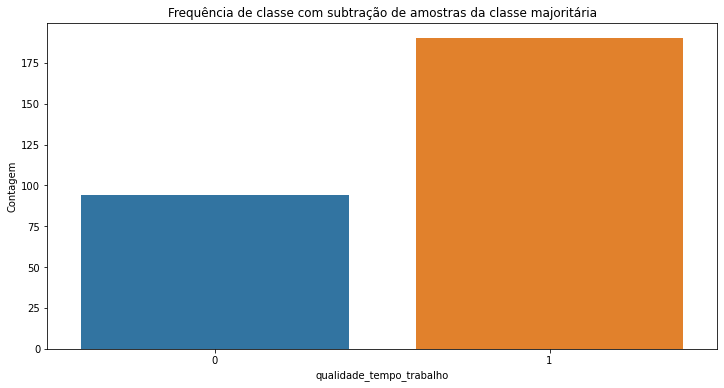

In [896]:
#Frequência de cada classe a partir da técnica de undersampling
plt.figure(figsize=(12,6))
sns.countplot(y_tomek)
plt.title('Frequência de classe com subtração de amostras da classe majoritária')
plt.ylabel('Contagem');

In [897]:
#Dividindo em treinamento e teste
x_tomek_train, x_tomek_test, y_tomek_train, y_tomek_test = tts(X_tomek, y_tomek, test_size=0.2, random_state=30)
x_tomek_train.shape, x_tomek_test.shape, y_tomek_train.shape, y_tomek_test.shape

((227, 48), (57, 48), (227,), (57,))

In [898]:
#Conferindo divisão
print('A base de teste é de aproximadamente {}%, comprovando que os dados foram corretamente divididos'.format(round((57/(227+57)),4)*100))

A base de teste é de aproximadamente 20.07%, comprovando que os dados foram corretamente divididos


In [899]:
#Treinando o modelo
from sklearn.linear_model import LogisticRegression
logistic_tomek = LogisticRegression(random_state=1)
logistic_model_tomek = logistic_tomek.fit(x_tomek_train, y_tomek_train)

In [900]:
#Prevendo
pred_logistic_tomek = logistic_model_tomek.predict(x_tomek_test)

In [901]:
#Resultados
print(classification_report(pred_logistic_tomek, y_tomek_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.97      0.97      0.97        39

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



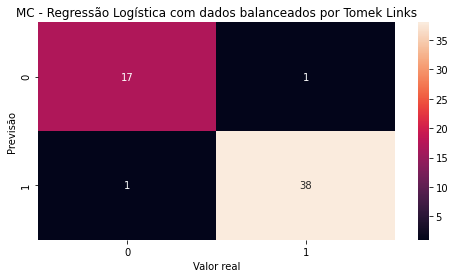

In [902]:
#Matriz de confusão
cm_logistic_tomek = confusion_matrix(pred_logistic_tomek, y_tomek_test)

#Gerando gráfico heatmap
plt.figure(figsize=(8,4))
sns.heatmap(cm_logistic_tomek, annot=True)
plt.title('MC - Regressão Logística com dados balanceados por Tomek Links', fontsize=12)
plt.ylabel('Previsão')
plt.xlabel('Valor real');

In [903]:
print('Quando o modelo previu que o funcionário ficaria ao menos dois anos, ele acertou em torno de {}%'.format(round(38/(38+1)*100,2)))
print('Quando o modelo previu que o funcionário ficaria menos de dois anos, ele acertou em torno de {}%'.format(round(17/(17+1)*100,2)))

Quando o modelo previu que o funcionário ficaria ao menos dois anos, ele acertou em torno de 97.44%
Quando o modelo previu que o funcionário ficaria menos de dois anos, ele acertou em torno de 94.44%


# 6 Entregando o modelo

In [905]:
#Importando o pickle para persistir o modelo
import pickle

In [906]:
#Salvando o modelo
with open('machine_learning_pre_selecao_rh.pkl', 'wb') as f:
    pickle.dump([scaler, onehot, logistic_model_tomek], f)

# 7 Testando modelo com dados criados

In [907]:
#Abrindo o modelo
with open('machine_learning_pre_selecao_rh.pkl', 'rb') as f:
    scaler, onehot, logistic_model_tomek = pickle.load(f)

In [908]:
scaler, onehot, logistic_model_tomek

(StandardScaler(),
 OneHotEncoder(sparse=False),
 LogisticRegression(random_state=1))

7.1 Primeiro teste

In [911]:
#Variáveis categóricas
categoricos = [['Técnico de Produção I', 'M', 'Casado(a)', 'Mudança de Carreira', 'Site da Empresa']]
categoricos_df = pd.DataFrame(categoricos)
categoricos_df

,0,1,2,3,4
0,Técnico de Produção I,M,Casado(a),Mudança de Carreira,Site da Empresa


In [912]:
#Conversão e criação de dataframe com valores convertidos
X_categoricos = onehot.transform(categoricos_df)
X_categoricos_df = pd.DataFrame(X_categoricos)
X_categoricos_df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [913]:
#Variáveis numéricas
numericos = {'Salário Mensal':[2000], 'projetos':[0], 'idade':[25], 'tempo_empresa':[1]}
numericos_df = pd.DataFrame(numericos)
numericos_df

,Salário Mensal,projetos,idade,tempo_empresa
0,2000,0,25,1


In [914]:
#Concatenando tipos de variáveis
candidato = pd.concat([X_categoricos_df, numericos_df], axis=1)
candidato

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,Salário Mensal,projetos,idade,tempo_empresa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2000,0,25,1


In [924]:
#Padronizando os dados
candidato_padronizado = scaler.transform(candidato)
candidato_padronizado

array([[-2.15554124e+00, -5.15148286e-01, -6.67663137e-01,
        -1.46207453e+00, -1.72917125e-01, -1.91805364e-01,
        -1.51994441e-01, -1.14332390e-01, -9.88533609e-02,
        -8.05822964e-02, -8.05822964e-02, -1.40487872e-01,
        -2.09215305e-01, -9.88533609e-02, -5.68880124e-02,
        -9.88533609e-02, -8.05822964e-02, -5.68880124e-02,
        -5.68880124e-02, -5.68880124e-02, -5.68880124e-02,
        -2.17479418e-01, -1.28036880e-01, -9.88533609e-02,
        -8.05822964e-02, -9.88533609e-02,  1.75783958e+01,
        -5.68880124e-02,  4.59813627e+00, -1.14332390e-01,
        -8.84086645e-01,  2.10679769e+00, -1.15361478e+00,
        -8.66840487e-01,  1.23301468e+00, -1.23301468e+00,
        -9.88533609e-02, -1.40487872e-01, -3.84900179e-01,
        -5.68880124e-02, -3.33333333e-01, -1.41764196e+00,
        -2.17479418e-01,  6.14410286e+00,  7.57228025e+03,
         2.17732422e+00,  8.25113431e+01,  3.21327096e+00]])

In [925]:
#Resultado
resultado = logistic_model_tomek.predict(candidato_padronizado)
if resultado == 0:
    print('Candidato está classificado para a próxima fase: ', resultado)
else:
    print('Candidato não está classificado para a próxima fase: ', resultado)

Candidato está classificado para a próxima fase:  [0]


7.2 Segundo teste

In [918]:
#Variáveis categóricas
categoricos = [['Técnico de Produção I', 'F', 'Solteiro', 'Infeliz', 'Site de Vagas']]
categoricos_df = pd.DataFrame(categoricos)
categoricos_df

,0,1,2,3,4
0,Técnico de Produção I,F,Solteiro,Infeliz,Site de Vagas


In [919]:
#Conversão e criação de dataframe com valores convertidos
X_categoricos = onehot.transform(categoricos_df)
X_categoricos_df = pd.DataFrame(X_categoricos)
X_categoricos_df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [920]:
#Variáveis numéricas
numericos = {'Salário Mensal':[3100], 'projetos':[1], 'idade':[33], 'tempo_empresa':[2]}
numericos_df = pd.DataFrame(numericos)
numericos_df

,Salário Mensal,projetos,idade,tempo_empresa
0,3100,1,33,2


In [921]:
#Concatenando tipos de variáveis
candidato = pd.concat([X_categoricos_df, numericos_df], axis=1)
candidato

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,Salário Mensal,projetos,idade,tempo_empresa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3100,1,33,2


In [923]:
#Padronizando os dados
candidato_padronizado = scaler.transform(candidato)
candidato_padronizado

array([[-2.15554124e+00, -5.15148286e-01, -6.67663137e-01,
        -1.46207453e+00, -1.72917125e-01, -1.91805364e-01,
        -1.51994441e-01, -1.14332390e-01, -9.88533609e-02,
        -8.05822964e-02, -8.05822964e-02, -1.40487872e-01,
        -2.09215305e-01, -9.88533609e-02, -5.68880124e-02,
        -9.88533609e-02, -8.05822964e-02, -5.68880124e-02,
        -5.68880124e-02, -5.68880124e-02, -5.68880124e-02,
        -2.17479418e-01, -1.28036880e-01, -9.88533609e-02,
        -8.05822964e-02, -9.88533609e-02,  1.75783958e+01,
        -5.68880124e-02,  4.59813627e+00, -1.14332390e-01,
        -8.84086645e-01,  2.10679769e+00, -1.15361478e+00,
        -8.66840487e-01,  1.23301468e+00, -1.23301468e+00,
        -9.88533609e-02, -1.40487872e-01, -3.84900179e-01,
        -5.68880124e-02, -3.33333333e-01, -1.41764196e+00,
        -2.17479418e-01,  6.14410286e+00,  7.57228025e+03,
         2.17732422e+00,  8.25113431e+01,  3.21327096e+00]])

In [926]:
#Resultado
resultado = logistic_model_tomek.predict(candidato_padronizado)
if resultado == 0:
    print('Candidato está classificado para a próxima fase: ', resultado)
else:
    print('Candidato não está classificado para a próxima fase: ', resultado)

Candidato está classificado para a próxima fase:  [0]
